# Real Estate Clean up

This is a real dataset and it was downloaded using web scraping techniques. The data contains registers from fotocasa which is one of the most popular websites of real estate in Spain. Please, do not do this (web scraping) unless it is for academic purposes.

The dataset was downloaded a few years ago by Henry Navarro and In no case were economic returns obtained from it.

It contains thousands of data from real houses published on the web www.fotocasa.com. Your goal is to extract as much information as possible with the knowledge you have so far about data science, for example what is the most expensive house in the entire dataset?

Let's start with precisely that question... Good luck!

#### Exercise 00. Read the dataset assets/real_estate.csv and try to visualize the table (★☆☆)

In [1]:
import pandas as pd

# this CSV file contains semicolons instead of comas as separator
ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,15331,153901377,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,96.0,259470,...,0,0,0,0,0,0,"40,45416","-3,70286",NaN,NaN
15331,15332,150394373,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,150.0,165000,...,0,0,0,0,0,0,"40,36652","-3,48951",NaN,NaN
15332,15333,153901397,False,tecnocasa torrelodones,912780348.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,175.0,495000,...,0,0,0,0,0,0,"40,57444","-3,92124",NaN,NaN
15333,15334,152607440,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,101.0,195000,...,0,0,0,0,0,0,"40,36967","-3,48105",NaN,NaN


#### Exercise 01. Which is the most expensive house in the dataset? (★☆☆)

Print the address and the price of the selected house. For example:

`The house with address General Street Nº5 is the most expensive and its price is 5000000 USD`

In [2]:
# this CSV file contains semicolons instead of comas as separator
ds = pd.read_csv('assets/real_estate.csv', sep=';')

# Find the price for the most expensive house in dataset 
high_price = ds['price'].max()

# Identify the column that contains the maximum values
max_col = 'price'

# Use the idxmax() method to find the index of the row that contains the maximum value
max_idx = ds[max_col].idxmax()

# Use the loc command to select the row with the maximum value
max_row = ds.loc[max_idx]

# test output print(max_row)

# Get the value for the name column in the row with the highest price
max_add = max_row['address']

print('The house with address', max_add, 'is the most expensive and its price is', high_price, 'USD.')

The house with address El Escorial is the most expensive and its price is 8500000 USD.


#### Exercise 02. Which is cheapest house in the dataset? (★☆☆)

Print the address and the price of the selected house. For example:

`The house with address Concrete Street Nº1 is the cheapest and its price is 12000 USD`

In [3]:
# this CSV file contains semicolons instead of comas as separator
ds = pd.read_csv('assets/real_estate.csv', sep=';')

# Find the price for the most expensive house in dataset 
low_price = ds['price'].min()

# Identify the column that contains the maximum values
min_col = 'price'

# Use the idxmax() method to find the index of the row that contains the maximum value
min_idx = ds[min_col].idxmin()

# Use the loc command to select the row with the maximum value
min_row = ds.loc[min_idx]

# test output print(min_row)

# Get the value for the name column in the row with the highest price
min_add = min_row['address']

print('The house with address', min_add, 'is the least expensive and its price is', low_price, 'USD.')

The house with address Parla is the least expensive and its price is 0 USD.


#### Exercise 03. Which is the biggest and the smallest house in the dataset? (★☆☆)

Print both the address and the surface of the selected houses. For example:

`The bigger house is located on Yukka Street Nº10 and its surface is 5000 meters`

`The smaller house is located on County Road 1 N and its surface is 200 meters`

In [4]:
# this CSV file contains semicolons instead of comas as separator
ds = pd.read_csv('assets/real_estate.csv', sep=';')

# Find the largest and smallest house by surface area in meters for a home in dataset 
big_sur = ds['surface'].max()
sml_sur = ds['surface'].min()

# Identify the column that contain the max/min values
col = 'surface'

# Use the idxmax() and idmin() method to find the index of the row that contains the max/min values
big_idx = ds[col].idxmax()
sml_idx = ds[col].idxmin()



# Use the loc command to select the rows with the max/min values
max_row = ds.loc[max_idx]
min_row = ds.loc[min_idx]

# test output print(max_row, min row)

# Get the values for the name column in the rows with the max/min surface values
max_add = max_row['address']
min_add = min_row['address']


print('The house with address', max_add, 'is the biggest in size and its surface area is', big_sur, 'meters')
print('The house with address', min_add, 'is the smallest in size and its surface area is', sml_sur, 'meters')

The house with address El Escorial is the biggest in size and its surface area is 249000.0 meters
The house with address Parla is the smallest in size and its surface area is 15.0 meters


#### Exercise 04. How many populations (level5 column) the dataset contains? (★☆☆)

Print the name of the populations with comma as separator. For example:

`> print(populations)`

`population1, population2, population3,...`

In [5]:
# Extract unique values from the column
unique_values = ds['level5'].unique()

# Convert the unique values to a list
unique_values_list = unique_values.tolist()

# Join the list elements with commas
unique_values_str = ', '.join(unique_values_list)

# Print the unique values with commas separating them
print(unique_values_str)

Arganda del Rey, Fuenlabrada, Boadilla del Monte, Las Rozas de Madrid,  Madrid Capital, Villaviciosa de Odón, Pinto, Valdemoro, Navalcarnero, Pozuelo de Alarcón, Torrejón de Ardoz, Navalagamella, San Sebastián de los Reyes, Rivas-vaciamadrid, Alpedrete, Móstoles, San Fernando de Henares, Coslada, Becerril de la Sierra, Alcalá de Henares, Chinchón, Parla, Alcorcón, El Escorial, Leganés, Pedrezuela, Majadahonda, Villanueva de la Cañada, Villanueva del Pardillo, Torrelodones, Moralzarzal, Mejorada del Campo, Aranjuez, Corpa, Getafe, Velilla de San Antonio, Sevilla la Nueva, San Martín de la Vega, Villalbilla, Collado Villalba, Alcobendas, El Molar (Madrid), Moraleja de Enmedio, Algete, Campo Real, Torrejón de la Calzada, Colmenar Viejo, Valdemorillo, Fuente El Saz de Jarama, Tres Cantos, Arroyomolinos (Madrid), Griñón, Paracuellos de Jarama, Guadarrama, Titulcia, Galapagar, Collado Mediano, Los Molinos, San Lorenzo de El Escorial, Loeches, San Martín de Valdeiglesias, Navas del Rey, Busta

#### Exercise 05. Does the dataset contain NAs? (★☆☆)

Print a boolean value (`true` or `fase`) followed by the rows/cols that contains NAs.

In [6]:
# Check for missing values in the DataFrame
has_nas = ds.isna().any().any()

# Print the Boolean value (True if there are NAs, False otherwise)
print(has_nas)

# If there are missing values, print the rows and columns that contain NAs
if has_nas:
    rows_with_nas = ds[ds.isna().any(axis=1)]
    cols_with_nas = ds.columns[ds.isna().any()].tolist()
    
    print("Rows with missing values:")
    print(rows_with_nas)
    
    print("Columns with missing values:")
    print(cols_with_nas)

True
Rows with missing values:
       Unnamed: 0  id_realEstates  isNew                    realEstate_name  \
0               1       153771986  False            ferrari 57 inmobiliaria   
1               2       153867863  False  tecnocasa fuenlabrada ferrocarril   
2               3       153430440  False                 look find boadilla   
3               4       152776331  False  tecnocasa fuenlabrada ferrocarril   
4               5       153180188  False            ferrari 57 inmobiliaria   
...           ...             ...    ...                                ...   
15330       15331       153901377  False                infocasa consulting   
15331       15332       150394373  False                inmobiliaria pulpon   
15332       15333       153901397  False             tecnocasa torrelodones   
15333       15334       152607440  False                inmobiliaria pulpon   
15334       15335       153901356  False                infocasa consulting   

       phone_realEst

#### Exercise 06. Delete the NAs of the dataset, if applicable (★★☆)

Print a comparison between the dimensions of the original DataFrame versus the DataFrame after the deletions

In [7]:
# drop NAs for every column with all NAs
ds_new = ds.dropna(axis=1, how = 'all')

print("Dataset w/o NaNs", ds_new.shape)
print("Initial dataset", ds.shape)

Dataset w/o NaNs (15335, 35)
Initial dataset (15335, 37)


In [8]:
# drop NAs for any row with above 2 NAs
ds_new2 = ds_new.dropna(axis=0, thresh=2)
print("Dataset w/ above 2 NaNs",ds_new2.shape)

Dataset w/ above 2 NaNs (15335, 35)


#### Exercise 07. Which is the mean of prices in the population (level5 column) of "Arroyomolinos (Madrid)"? (★★☆)

Print the obtained value

In [9]:
# Filter the DataFrame to include only rows with 'Arroyomolinos (Madrid)' in 'level5'
subset = ds[ds['level5'] == 'Arroyomolinos (Madrid)']

#subset.describe()

# Calculate the mean for 'Arroyomolinos (Madrid)' in 'level5'
mean_A = subset['price'].mean().round(2)

print('The mean of the prices of the population Arroyomolinos (Madrid) is', mean_A, 'USD')

The mean of the prices of the population Arroyomolinos (Madrid) is 294541.6 USD


#### Exercise 08. Plot the histogram of prices for the population (level5 column) of "Arroyomolinos (Madrid)" and explain what you observe (★★☆)

Print the histogram of the prices and write in the Markdown cell a brief analysis about the plot.

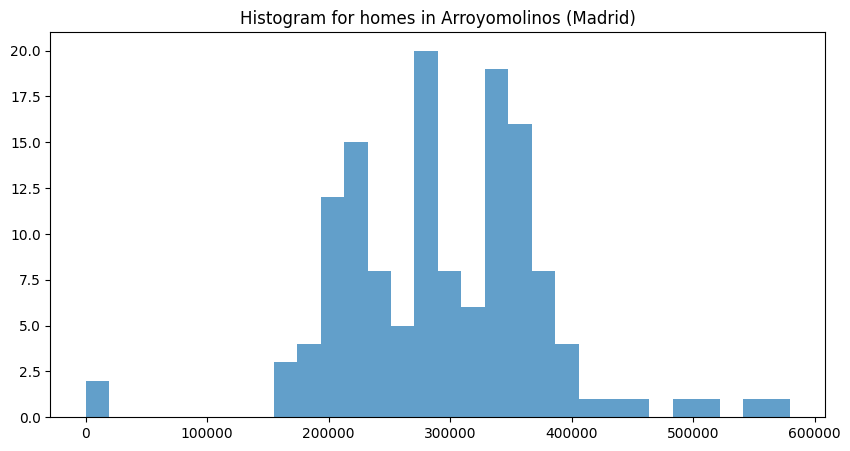

In [10]:
import matplotlib.pyplot as plt
data = subset['price']

# plot histogram of prices for poupulation of Arroyomolinos (Madrid)
plt.figure(figsize = (10, 5))
plt.hist(data, bins = 30, alpha = 0.7)
plt.title("Histogram for homes in Arroyomolinos (Madrid)")
plt.show()

In [11]:
# Drop zero Value prices from set
dsnotz = subset['price'] !=0

# Use the mask to extract values from the column
result = subset.loc[dsnotz, 'price']

result.describe()

count       135.000000
mean     298905.177778
std       76672.083974
min      165338.000000
25%      232450.000000
50%      294000.000000
75%      348950.000000
max      580000.000000
Name: price, dtype: float64

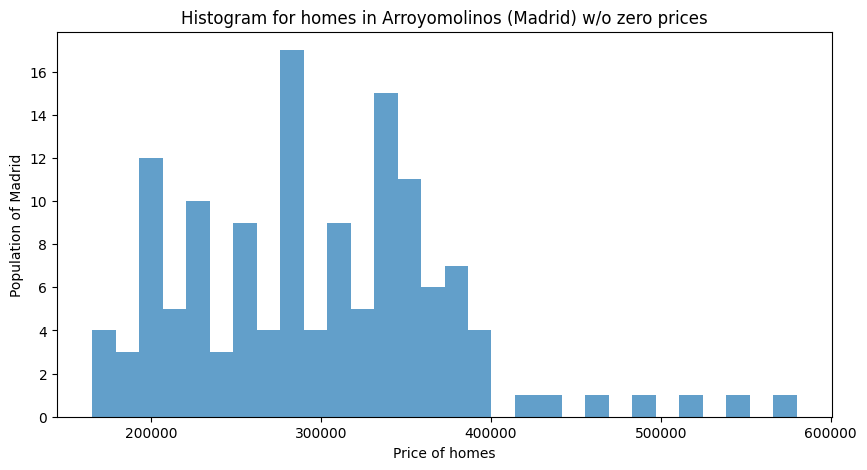

In [12]:
# plot histogram of prices for poupulation of Arroyomolinos (Madrid)
plt.figure(figsize = (10, 5))
plt.hist(result, bins = 30, alpha = 0.7)
plt.ylabel("Population of Madrid")
plt.xlabel("Price of homes")
plt.title("Histogram for homes in Arroyomolinos (Madrid) w/o zero prices")
plt.show()

####  The historgram of the prices for this population seems to contain multiple sub-groups as indicated by the three columns with prices ranging between 150000 and just over 400000 USD. Also there are two homes with zero values and few homes above 475000 that may warrant additional evaluation.   

#### Exercise 09. Is the average of "Valdemorillo" and "Galapagar" prices the same? (★★☆)

Print the both average prices and then write a conclusion about them

In [13]:
# Filter the DataFrame to include only rows with 'Valdemorillo' in 'level5'
val_set = ds[ds['level5'] == 'Valdemorillo']

# Calculate the mean for 'Valdemorillo' in 'level5'
mean_val = val_set['price'].mean().round(2)

# Filter the DataFrame to include only rows with 'Galapagar' in 'level5'
gal_set = ds[ds['level5'] == 'Galapagar']

# Calculate the mean for 'Galapagar' in 'level5'
mean_gal = gal_set['price'].mean().round(2)

print('The average price for a Valdemorillo home is', mean_val, 'USD')
print('The average price for a Galapagar home is', mean_gal, 'USD')

The average price for a Valdemorillo home is 363860.29 USD
The average price for a Galapagar home is 360063.2 USD


#### Exercise 10. Is the average of "Valdemorillo" and "Galapagar" price per square meter (price/m2) the same? (★★☆)

Print the both average prices and then write a conclusion about

Hint: Create a new column called `pps` (price per square) and then analyse the values

In [14]:
import pandas as pd
ds = ds_new 

# Define a function to calculate the new value
def calculate_new_value(row):
    return row['price'] / row['surface']

# Apply the function to the DataFrame using the 'apply()' method
ds['pps'] = ds.apply(calculate_new_value, axis=1)

# Print the DataFrame
ds

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level3Id,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,pps
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",1893.203883
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,0,1,"40,28674","-3,79351",NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",3939.393939
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",1034.883721
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",1622.641509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,15331,153901377,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,96.0,259470,...,0,0,0,0,0,0,0,"40,45416","-3,70286",2702.812500
15331,15332,150394373,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,150.0,165000,...,0,0,0,0,0,0,0,"40,36652","-3,48951",1100.000000
15332,15333,153901397,False,tecnocasa torrelodones,912780348.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,175.0,495000,...,0,0,0,0,0,0,0,"40,57444","-3,92124",2828.571429
15333,15334,152607440,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,101.0,195000,...,0,0,0,0,0,0,0,"40,36967","-3,48105",1930.693069


In [15]:
# Filter the DataFrame to include only rows with 'Valdemorillo' in 'level5'
val_set = ds[ds['level5'] == 'Valdemorillo']

# Calculate the mean for 'Valdemorillo' in 'level5'
mean_val = val_set['pps'].mean().round(2)

# Filter the DataFrame to include only rows with 'Galapagar' in 'level5'
gal_set = ds[ds['level5'] == 'Galapagar']

# Calculate the mean for 'Galapagar' in 'level5'
mean_gal = gal_set['pps'].mean().round(2)

print('The average price/m2 for a Valdemorillo home is', mean_val, 'USD')
print('The average price/m2 for a Galapagar home is', mean_gal, 'USD')

The average price/m2 for a Valdemorillo home is 1317.95 USD
The average price/m2 for a Galapagar home is 1606.32 USD


#### Exercise 11. Analyse the relation between the surface and the price of the houses (★★☆)

Hint: You can make a `scatter plot` and then write a conclusion about it

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

X = ds['surface']
y = ds['price']

#describe surface and price data
col_2_describe = ['surface', 'price']
describeds = ds[col_2_describe].describe()

print(describeds)


             surface         price
count   14085.000000  1.533500e+04
mean      196.916436  4.773036e+05
std      2182.758313  5.912942e+05
min        15.000000  0.000000e+00
25%        80.000000  1.690000e+05
50%       114.000000  2.800000e+05
75%       205.000000  5.400000e+05
max    249000.000000  8.500000e+06


In [17]:
# Drop rows with 'price' values equal to 0 or greater than 600000
df = ds[(ds['price'] > 0) & (ds['price'] <= 600000)]

# Drop rows with 'surface' values equal to 0
df = ds[ds['surface'] != 0]

# If you want to reset the index after dropping rows
df = df.reset_index(drop=True)

# Display the modified DataFrame
df.describe()

,Unnamed: 0,id_realEstates,phone_realEstate,rooms,bathrooms,surface,price,countryId,level1Id,level2Id,level3Id,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,pps
count,15335.000000,1.533500e+04,1.454100e+04,14982.000000,14990.000000,14085.000000,1.533500e+04,15335.0,15335.0,15335.0,15335.0,15335.0,15335.0,15335.0,15335.0,15335.0,15335.000000,14085.000000
mean,7668.000000,1.524371e+08,9.143423e+08,3.231611,2.150233,196.916436,4.773036e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166873,2940.718554
std,4426.977524,2.277286e+06,7.516036e+06,1.393106,1.292079,2182.758313,5.912942e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.372875,1904.462348
min,1.000000,1.221584e+08,8.762742e+08,1.000000,1.000000,15.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
25%,3834.500000,1.519456e+08,9.113649e+08,2.000000,1.000000,80.000000,1.690000e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1660.714286
50%,7668.000000,1.532413e+08,9.121841e+08,3.000000,2.000000,114.000000,2.800000e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2329.113924
75%,11501.500000,1.538105e+08,9.148904e+08,4.000000,3.000000,205.000000,5.400000e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,3800.000000
max,15335.000000,1.540033e+08,9.887761e+08,30.000000,20.000000,249000.000000,8.500000e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,37435.897436


In [18]:
# Drop rows with 'surface' values equal to 0
df = ds[ds['surface'] <= 3000] 

# If you want to reset the index after dropping rows
df = df.reset_index(drop=True)

# Display the modified DataFrame
df.describe()

,Unnamed: 0,id_realEstates,phone_realEstate,rooms,bathrooms,surface,price,countryId,level1Id,level2Id,level3Id,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,pps
count,14078.000000,1.407800e+04,1.335800e+04,13757.000000,13784.000000,14078.000000,1.407800e+04,14078.0,14078.0,14078.0,14078.0,14078.0,14078.0,14078.0,14078.0,14078.0,14078.000000,14078.000000
mean,7540.905455,1.524417e+08,9.143804e+08,3.225703,2.148578,172.045887,4.875184e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.169484,2942.148446
std,4401.767209,2.230810e+06,7.710017e+06,1.369829,1.274708,170.822535,6.016457e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.375192,1903.854980
min,1.000000,1.221584e+08,8.762742e+08,1.000000,1.000000,15.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
25%,3692.250000,1.519382e+08,9.113642e+08,2.000000,1.000000,80.000000,1.700000e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1662.404420
50%,7543.500000,1.532305e+08,9.121838e+08,3.000000,2.000000,114.000000,2.850000e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2329.466752
75%,11283.750000,1.538042e+08,9.148901e+08,4.000000,3.000000,205.000000,5.500000e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,3800.000000
max,15335.000000,1.540033e+08,9.887761e+08,18.000000,13.000000,2600.000000,8.000000e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,37435.897436


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


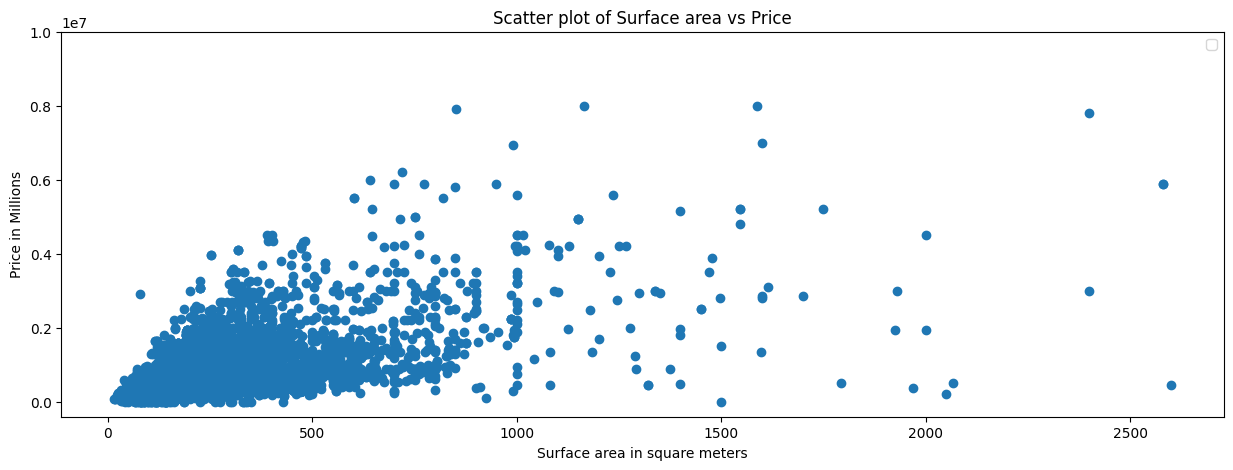

In [19]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import ScalarFormatter
import numpy as np

X2 = df['surface']
y2 = df['price']

# Create a scatter plot
fig, ax = plt.subplots(figsize = (15, 5))
plt.scatter(X2, y2)

# Specify the major ticks
#ax.yaxis.set_major_locator(ticker.MultipleLocator(1000000))

# Specify the minor ticks
#ax.yaxis.set_minor_locator(ticker.MultipleLocator(250000))

# Set y-axis ticks in increments of 250,000 from 0 to 10,000,000
plt.yticks(range(0, 10000001, 250000))

# Format y-axis labels as integers
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=False))

# Set y-axis scale to linear
plt.yscale('linear')

plt.ylabel("Price in Millions")
plt.xlabel("Surface area in square meters")


plt.title("Scatter plot of Surface area vs Price")
plt.legend()
plt.show() 

### The dataset contains several outliers for both Price and Surface area as well as zeros. First I removed the zero values for both surface and price as well as homes with prices above 600000 since this well outside the 75% QTL for price. Next I removed surface values above 3000 to evaluate the trend at the extremes for surface area. The revised scatter plot illustrates the concentration of values and the pattern between surface and price for the data set. 

**TODO: Markdown**. To write here, double click to this cell and just remove this content and place the text you want to write. Then, execute the cell.

#### Exercise 12. How many real estate agencies the dataset contains? (★★☆)

Print the obtained value

In [20]:
# import pandas as pd
agents = ds['realEstate_name'].nunique()
print('There are', agents, 'Real Estate ageencies in the dataset.')

There are 1821 Real Estate ageencies in the dataset.


#### Exercise 13. Which is the population (level5 column) that contains the most houses? (★★☆)

Print both the population and the number of houses

In [21]:
most = ds['level5'].value_counts()
most

level5
 Madrid Capital         6643
Alcalá de Henares        525
Las Rozas de Madrid      383
Móstoles                 325
Getafe                   290
                        ... 
Brea de Tajo               1
El Atazar                  1
Piñuécar-gandullas         1
Braojos                    1
Montejo de la Sierra       1
Name: count, Length: 168, dtype: int64

### The Madrid Capital population has the most houses in the data set.

#### Exercise 14. Now let's work with the "south belt" of madrid. Make a subset of the original DataFrame that contains the following populations (level5 column): "Fuenlabrada","Leganés","Getafe","Alcorcón" (★★☆)

Hint: Filter the original DataFrame using the column `level5` and the function `isin`

In [22]:
# Sort these groups out of new dataset
ds_South = ds.loc[ds['level5'].isin(['Fuenlabrada','Leganés','Getafe','Alcorcón'])]
ds_South

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level3Id,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,pps
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,0,1,"40,28674","-3,79351",NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",1034.883721
85,86,153152077,False,sinergical inmobiliaria,NaN,https://www.fotocasa.es/es/comprar/vivienda/le...,1.0,1.0,50.0,107000,...,0,0,0,0,0,0,1,"40,35059","-3,82693",2140.000000
94,95,153995577,False,viviendas365com,911226014.0,https://www.fotocasa.es/es/comprar/vivienda/le...,3.0,2.0,120.0,320000,...,0,0,0,0,0,0,0,"40,31933","-3,77574",2666.666667
109,110,153586414,False,area uno asesores inmobiliarios,912664081.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,3.0,142.0,425000,...,0,0,0,0,0,0,0,"40,3313411","-3,8313868",2992.957746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15275,15276,153903887,False,aliseda servicios de gestion inmobiliaria,911368198.0,https://www.fotocasa.es/es/comprar/vivienda/al...,3.0,1.0,78.0,138000,...,0,0,0,0,0,0,1,"40,31381","-3,83733",1769.230769
15291,15292,151697757,False,unipiso,912788631.0,https://www.fotocasa.es/es/comprar/vivienda/al...,3.0,2.0,110.0,279000,...,0,0,0,0,0,0,0,"40,3259051","-3,76318",2536.363636
15305,15306,153902389,False,jadein ferrero,914871639.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,85.0,170000,...,0,0,0,0,0,0,0,"40,2882193","-3,8098617",2000.000000
15322,15323,153871864,False,gestion comercial,911220662.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,91.0,112000,...,0,0,0,0,0,0,0,"40,28282","-3,78892",1230.769231


#### Exercise 15. Make a bar plot of the median of the prices and explain what you observe (you must use the subset obtained in the question 14) (★★★)

Print the bar of the median of the prices and write in the Markdown cell a brief analysis about the plot

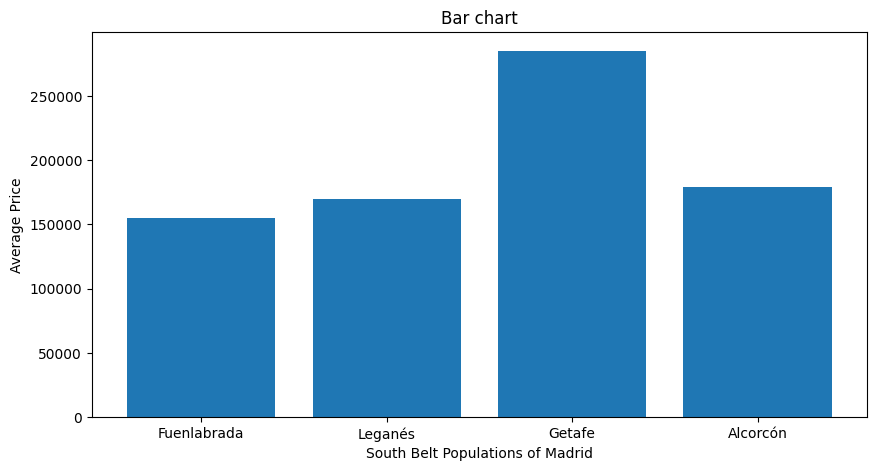

In [23]:
# Filter the DataFrame to include only rows with each population in 'level5'
fue_set = ds[ds['level5'] == 'Fuenlabrada']
lm_set = ds[ds['level5'] == 'Leganés']
gm_set = ds[ds['level5'] == 'Getafe']
am_set = ds[ds['level5'] == 'Alcorcón']


# Calculate the mean for each population in 'level5'
fue_avg = fue_set['price'].median().round(2)
lm_avg = lm_set['price'].median().round(2)
gm_avg = gm_set['price'].median().round(2)
am_avg = am_set['price'].median().round(2)

labels = ["Fuenlabrada","Leganés","Getafe","Alcorcón"]
values = [fue_avg, lm_avg, gm_avg, am_avg]

plt.figure(figsize = (10, 5))

plt.bar(labels, values)
plt.ylabel("Average Price")
plt.xlabel("South Belt Populations of Madrid")
plt.title("Bar chart")
plt.show()

#### It seems that the Getafe population has the highest median priced home in the dataset by a signficant amount of difference

#### Exercise 16. Calculate the sample mean and variance of the variables: price, rooms, surface area and bathrooms (you must use the subset obtained in the question 14) (★★★)

Print both values for each variable

In [24]:
s1 = ds_South

# Statistical Operations
# They can be applied in the same way to DataFrames
print("Sample Mean for price: ", s1['price'].mean().round(2))
print("Variance for price:", s1['price'].var().round(2))
print("Sample Mean for rooms: ", s1['rooms'].mean().round(2))
print("Variance for rooms:", s1['rooms'].var().round(2))
print("Sample Mean for Surface area: ", s1['surface'].mean().round(2))
print("Variance for Surface area:", s1['surface'].var().round(2))
print("Sample Mean for bathrooms: ", s1['bathrooms'].mean().round(2))
print("Variance for bathroom:", s1['bathrooms'].var().round(2))


Sample Mean for price:  223094.48
Variance for price: 14921367508.05
Sample Mean for rooms:  3.02
Variance for rooms: 0.72
Sample Mean for Surface area:  111.75
Variance for Surface area: 4263.05
Sample Mean for bathrooms:  1.63
Variance for bathroom: 0.57


#### Exercise 17. What is the most expensive house of each population? You must use the subset obtained in the question 14 (★★☆)

Print both the address and the price of the selected house of each population. You can print a DataFrame or a single line for each population

In [25]:
# Group the populations in dataset 
fue_set = ds[ds['level5'] == 'Fuenlabrada']
lm_set = ds[ds['level5'] == 'Leganés']
gm_set = ds[ds['level5'] == 'Getafe']
am_set = ds[ds['level5'] == 'Alcorcón']

# Calculate the highest price for each population in 'level5'
# fue_max = fue_set['price'].max()

# Identify the column that contains the maximum value for each population
max_col = 'price'

# Use the idxmax() method to find the index of the row that contains the maximum value
fue_id = fue_set[max_col].idxmax()
lm_id = lm_set[max_col].idxmax()
gm_id = gm_set[max_col].idxmax()
am_id = am_set[max_col].idxmax()


# Use the loc command to select the row with the maximum value
max_fue = fue_set.loc[fue_id]
max_lm = lm_set.loc[lm_id]
max_gm = gm_set.loc[gm_id]
max_am = am_set.loc[am_id]


# Get the value for the name column in the row with the highest price
fue_add = max_fue['address']
lm_add = max_lm['address']
gm_add = max_gm['address']
am_add = max_am['address']

print('The house with address', fue_add, 'is the most expensive in Fuenlabrada.')
print('The house with address', lm_add, 'is the most expensive in Leganés.')
print('The house with address', gm_add, 'is the most expensive in Getafe.')
print('The house with address', am_add, 'is the most expensive in Alcorcón.')


The house with address Calle de Paulo Freire, 5, Fuenlabrada is the most expensive in Fuenlabrada.
The house with address Avenida Reina Sofía, Leganés is the most expensive in Leganés.
The house with address Getafe is the most expensive in Getafe.
The house with address Alcorcón is the most expensive in Alcorcón.


#### Exercise 18. Normalize the variable of prices for each population and plot the 4 histograms in the same plot (you must use the subset obtained in the question 14) (★★★)

For the normalization method you can use the one you consider to, there is not a single correct answer to this question. Print the plot and write in the Markdown cell a brief analysis about the plot

Hint: You can help yourself reviewing the multihist demo of Matplotlib

/tmp/ipykernel_5283/2490280462.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds["price_st"] = ds.groupby(["level5"])["price"].transform(lambda x: (x-np.mean(x))/(np.std(x))) #MEAN NORMALIZATION!


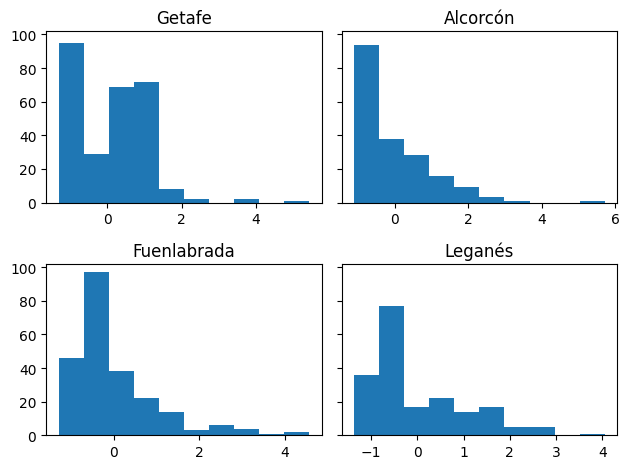

In [26]:
ds = ds_South

import numpy as np
import matplotlib.pyplot as plt
ds["price_st"] = ds.groupby(["level5"])["price"].transform(lambda x: (x-np.mean(x))/(np.std(x))) #MEAN NORMALIZATION!
fig, ax = plt.subplots(2, 2, sharey = True)
ax[0, 0].hist(ds.loc[(ds["level5"]=="Getafe") & (ds["price"]>0),"price_st"])
ax[0, 1].hist(ds.loc[(ds["level5"]=="Alcorcón") & (ds["price"]>0),"price_st"])
ax[1, 0].hist(ds.loc[(ds["level5"]=="Fuenlabrada") & (ds["price"]>0),"price_st"])
ax[1, 1].hist(ds.loc[(ds["level5"]=="Leganés") & (ds["price"]>0),"price_st"])
ax[0, 0].set_title('Getafe')
ax[0, 1].set_title('Alcorcón')
ax[1, 0].set_title('Fuenlabrada')
ax[1, 1].set_title('Leganés')
plt.tight_layout() # evita que se superpongan las etiquetas de los ejes con los títulos
plt.show()

**TODO: Markdown**. To write here, double click to this cell and just remove this content and place the text you want to write. Then, execute the cell.

#### Exercise 19. What can you say about the price per square meter (price/m2) between the towns of "Getafe" and "Alcorcón"? You must use the subset obtained in the question 14 (★★☆)

Hint: Create a new column called `pps` (price per square) and then analyse the values

In [27]:
# Define a function to calculate the new value
def calculate_new_value(row):
    return row['price'] / row['surface']

# Apply the function to the DataFrame using the 'apply()' method
ds['pps'] = ds.apply(calculate_new_value, axis=1)


# Print the DataFrame
ds

/tmp/ipykernel_5283/1288099743.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['pps'] = ds.apply(calculate_new_value, axis=1)


,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,pps,price_st
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,-1.289130
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",1034.883721,-1.289130
85,86,153152077,False,sinergical inmobiliaria,NaN,https://www.fotocasa.es/es/comprar/vivienda/le...,1.0,1.0,50.0,107000,...,0,0,0,0,0,1,"40,35059","-3,82693",2140.000000,-0.977127
94,95,153995577,False,viviendas365com,911226014.0,https://www.fotocasa.es/es/comprar/vivienda/le...,3.0,2.0,120.0,320000,...,0,0,0,0,0,0,"40,31933","-3,77574",2666.666667,1.022492
109,110,153586414,False,area uno asesores inmobiliarios,912664081.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,3.0,142.0,425000,...,0,0,0,0,0,0,"40,3313411","-3,8313868",2992.957746,1.547646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15275,15276,153903887,False,aliseda servicios de gestion inmobiliaria,911368198.0,https://www.fotocasa.es/es/comprar/vivienda/al...,3.0,1.0,78.0,138000,...,0,0,0,0,0,1,"40,31381","-3,83733",1769.230769,-0.572931
15291,15292,151697757,False,unipiso,912788631.0,https://www.fotocasa.es/es/comprar/vivienda/al...,3.0,2.0,110.0,279000,...,0,0,0,0,0,0,"40,3259051","-3,76318",2536.363636,0.645894
15305,15306,153902389,False,jadein ferrero,914871639.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,85.0,170000,...,0,0,0,0,0,0,"40,2882193","-3,8098617",2000.000000,-0.105209
15322,15323,153871864,False,gestion comercial,911220662.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,91.0,112000,...,0,0,0,0,0,0,"40,28282","-3,78892",1230.769231,-0.952955


In [28]:
# Group the populations in dataset 
gm_set = ds[ds['level5'] == 'Getafe']
am_set = ds[ds['level5'] == 'Alcorcón']


print("Mean for Getafe home price is", gm_set['pps'].mean().round(2))
print("Mean for Alcorcón home price is", am_set['pps'].mean().round(2))

print("Median for Getafe home price is", gm_set['pps'].median().round(2))
print("Median for Alcorcón home price is", am_set['pps'].median().round(2))

print("Mode for Getafe home price is", gm_set['pps'].mode().round(2))
print("Mode for Alcorcón home price is", am_set['pps'].mode().round(2))

Mean for Getafe home price is 2066.31
Mean for Alcorcón home price is 2239.3
Median for Getafe home price is 1973.33
Median for Alcorcón home price is 2207.79
Mode for Getafe home price is 0    0.0
Name: pps, dtype: float64
Mode for Alcorcón home price is 0    2397.26
Name: pps, dtype: float64


#### It seems that Getafe and Alcorcón have comparable average and median values in price but the Getafe population contains some zeros and should required additional analysis. Also the mode for Alcorcón is higher than both the mean and median for that group. Perhaps a scatter plot or other visualization tools would help. 

#### Exercise 20. Make the same plot for 4 different populations (level5 column) and rearrange them on the same graph? You must use the subset obtained in the question 14 (★★☆) 
Hint: make a scatter plot of each population using subplots.

/tmp/ipykernel_5283/151831845.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds["price_st"] = ds.groupby(["level5"])["price"].transform(lambda x: (x-np.mean(x))/(np.std(x))) #MEAN NORMALIZATION!


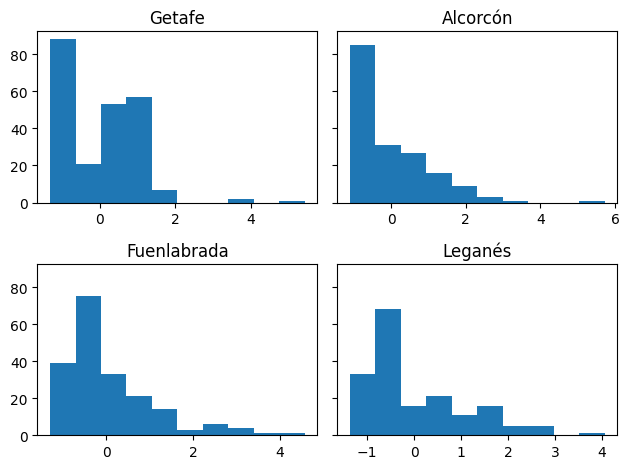

In [37]:
ds = ds_South

import numpy as np
import matplotlib.pyplot as plt
ds["price_st"] = ds.groupby(["level5"])["price"].transform(lambda x: (x-np.mean(x))/(np.std(x))) #MEAN NORMALIZATION!
fig, ax = plt.subplots(2, 2, sharey = True)
ax[0, 0].hist(ds.loc[(ds["level5"]=="Getafe") & (ds["pps"]>0),"price_st"])
ax[0, 1].hist(ds.loc[(ds["level5"]=="Alcorcón") & (ds["pps"]>0),"price_st"])
ax[1, 0].hist(ds.loc[(ds["level5"]=="Fuenlabrada") & (ds["pps"]>0),"price_st"])
ax[1, 1].hist(ds.loc[(ds["level5"]=="Leganés") & (ds["pps"]>0),"price_st"])
ax[0, 0].set_title('Getafe')
ax[0, 1].set_title('Alcorcón')
ax[1, 0].set_title('Fuenlabrada')
ax[1, 1].set_title('Leganés')
plt.tight_layout() # keeps the tick marks within the axis along with titles
plt.show()

#### Exercise 21. Make a plot of the coordinates (latitude and longitude columns) of the south belt of Madrid by color of each population (you must use the subset obtained in the question 14) (★★★★)

Execute the following cell and then start coding in the next one. You must implement a simple code that transform the coordinates columns in a Python dictionary (add more information if needed) and then add it to the map

In [38]:
from ipyleaflet import Map, MarkerCluster, CircleMarker, basemaps, AwesomeIcon, Popup, WidgetControl, LegendControl
from branca.colormap import linear

# Map centred on (Average latitude and lognitude)
map = Map(center=(40, -3), zoom=8)
map

Map(center=[40, -3], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_tex…

In [39]:
## HERE: plot the coordinates of the estates and convert to float
ds["latitude"] = ds["latitude"].str.replace(',', '.').astype(float)
ds["longitude"] = ds["longitude"].str.replace(',', '.').astype(float)

AttributeError: Can only use .str accessor with string values!

In [41]:
#describe latotitude and longitude data
coord_describe = ['latitude', 'longitude']
describecrds = ds[coord_describe].describe()
print(describecrds)

         latitude   longitude
count  907.000000  907.000000
mean    39.827854   -3.732202
std      4.415445    0.415606
min      0.000000   -3.866468
25%     40.294242   -3.809873
50%     40.316220   -3.779777
75%     40.335958   -3.738480
max     40.359965    0.000000


In [42]:
from ipyleaflet import Map, MarkerCluster, CircleMarker, basemaps, AwesomeIcon, Popup, WidgetControl, LegendControl
from branca.colormap import linear
import numpy as np

# Define a colormap for subgroups
colormap = {'Getafe': 'red', 'Alcorcón': 'blue', 'Fuenlabrada': 'green', 'Leganés': 'orange'}  # subgroups for level5 populations

# Create a Map
m = Map(center=(np.mean(df['latitude']), np.mean(df['longitude'])), zoom=8)

# Add CircleMarkers to the map
for index, row in ds.iterrows():
    circle = CircleMarker(location=(row['latitude'], row['longitude']),
                          radius=5,
                          color=colormap.get(row['level5'], 'gray'),  # Default to gray for unknown categories
                          fill=True)
    m.add_layer(circle)
# Display the map
m

TypeError: Could not convert string '40,294827678643840,411564678643840,285378578643840,299877486437640,5339140,510584213562440,5329440,536305786437640,3750240,381125786437640,366717886988540,2554540,1902540,283840,4733540,4672340,453315786437640,442962940,445684213562440,46731040,4279557864376040,6584940,4029340,473197840,4255340,3039440,4784540,4732640,4938240,417961421356240,4249340,403990837493540,7074440,455285786437640,4579340,50140,433760440,390762440,470140,343516640,411202721356240,396133821356240,5122179540,441023840,406272028643840,421771340,467929340,443084940,390620978643840,442657940,465056240,424460678643840,448043221356240,256971421356240,42373840,394671421356240,434479440,452677978643840,50140,391040440,423864540,423986178643840,442926340,433060821356240,393141221356240,476361521356240,489685240,436263021356240,434764740,444109678643840,439311978643840,388785786437640,390620978643840,385526540,390620978643840,137340,390562440,241221878643840,3863840,2397640,401461840,425085840,3505940,4430540,4785140,4367340,587249940,406840,448405786437640,421568940,4260831640,3193340,23083540,43560690794940,4347840,4709240,4682740,4050340,764412440,48799140,51629140,47492840,4648340,4915840,5414640,495267340,331341140,5843540,45805653195240,4049840,702540,4490440,4532640,4784340,3846440,545226836437640,3957940,4143340,4280940,473659840,403303440,42895540,42451540,0315440,399018340,385463940,450064440,43713340,421747840,43438440,50140,401919940,6779540,50140,292844240,4938740,397140,3734940,3890540,444809740,439280840,474440,470995786437640,4233940,4732640,3894811440,42654121212540,4209840,4206840,47655240,3149540,3149540,3210640,4103940,17676697908740,4322840,274480771815640,4953440,4335840,4612940,4788340,29909779151740,42499592718140,4220982927140,3111140,51868340,47817140,47700840,51920140,481727786437640,4890240,405740,4117740,373486240,394245740,42783394607340,4397840,3907240,3728240,3888440,390562440,35691940,47490440,3434140,4323640,327440,4369940,4107340,425338578643840,41360075305940,4854340,4210340,23263540,390562440,3614240,393174925540,43309539414440,43489478389240,4293961640,4284640,4284640,180163840,184001640,4490440,4266340,429395786437640,290681421356240,392534527587940,432388578643840,6453340,4501740,315252958540,43236784318240,4227140,429615786437640,420798540,3936840,43086442290140,42313225902440,4654340,4764240,4505340,292179640,401778578643840,306055840,303568940,382222440,3710840,2922440,5004340,5427940,3484640,4658140,437440,40734340,4503240,209506165584340,4313240,4326140,3943640,4529940,4975740,231151740,3480340,3990640,474484024640,431113640,4314240,3091440,4653940,482425966262240,50048540,630740,237932340062940,4330440,4616740,414129528808640,3037440,2943240,306898740,4365540,424494840,314281186437640,4270440,44616640,4678340,4555140,35862740,4311440,3904540,4244340,5268940,5187840,400840,406240,416440,02944488177240,4053240,4178340,240095440,4860140,4233640,4743740,5051940,730382340,4335640,381940,3634840,40495740,3532540,468959094940,396184440,451158140,4992740,4812640,4335640,1905440,4587140,4266640,4892840,4772640,260344855070640,35820240,478940,4384662440,4210140540,5064340,5086640,401740,4591140,3920940,3138140,3968840,3212440,5970740,47234240,4481540,299461443889240,425925786437640,4365840,299902340,3433140,3421440,3783240,4209540,39812963480940,4910740,4351840,4323740,572018086437640,38443702173240,3552440,50140,538035786437640,50140,4030540,389157140,4640140,354840,353532840,4196940,4617540,3802640,304997140,45477740,3374540,4846140,646223540,560340,20005340,2320240,4215540,426007486437640,4403740,5429240,4589440,4070840,436546940,4658540,487775786437640,2536840,242970378643840,4212240,43954845427640,5081740,2832740,4262340,404440197753940,657055786437640,2974240,645249043457440,63047028205340,6484340,5000940,3985540,38005339887540,4360364140,42890286302340,533581786437640,421025786437640,4556340,4248240,20043440,4121940,4417540,3850840,468453252808140,404985786437640,4311840,4517640,4053140,5443640,4706740,222340,1847140,4205740,6295640,410127140,4345940,4316640,4522840,38669840,3971540,428195786437640,3458340,303495786437640,4301240,4317840,438485786437640,4323640,4315640,4230340,5391240,427108240,47147240,44483440,444470421356240,225308540,60780540,4793440,40721440,44229140,3985740,4315840,4303240,3870540,4632640,4542240,531740840,439341240,389511108398440,46342540,2765740,44099140,4734340,4498940,3548440,4482540,4425740,5448840,376745086437640,2182340,431293240,3077940,3368640,3018440,3009140,3763340,438865786437640,390768578643840,239728586437640,23513340,392345701682740,17506440,179856786437640,3494940,497292753140,495640,4347840,244940,389141540,48814540,3913440,6737222440,6312980540,434205786437640,3325240,4094140,4285140,4644440,289243540,383340,3063540,444900140,482395786437640,184006840277340,4081840,4226840,42449603275140,4272840,401740,242716140,22540,4537440,44149046325440,4860140,4605640,3605140,322005138740,241116340,315308440,452448840,4340840,313356240,496540,49704640,492411786437640,7067840,3463940,4460740,2424540,241957178643840,291560240,239159340,13763940,38857602941640,487560786437640,4563640,4101240,423134240,41457070876540,36397940,3884540,470340,4606740,400840,3609740,5222640,5242340,4998840,4790240,4464840,301275786437640,489940,384340,64536565745440,374940,44405313973440,4751840,4734840,356364640,389485786437640,3784640,3655840,3882340,3786240,3513740,355840,3532240,3825840,3732840,3546940,3605240,3492440,361340,3625240,441239678511340,3570640,3899440,3858340,362140,3576940,3591740,5486340,42007540,3753840,393140,4211840,645485500219340,3775540,364127840,428594330940,45311240,41265116810640,4860440,3796740,69299140,70463440,4699540,4261574140,3464140,4124540,321840,4858740,474848539840,4124540,332880150042140,4323740,4873540,4628940,241518940,3744840,0247140,256863515402740,23962840,5938340,476440,405069622802740,412859234619140,283969740,4788540,3810740,572888578643840,5829740,486140,4218540,61228840,421589740,4363898891240,44801692394140,42229340,353266640,3974940,4216240,4378740,47075420322740,5707540,3924440,3571640,4199640,4765140,2778240,5513740,4389840,230846840,42705240,4254540,527635840,4246740,425732840,40546440,237238940,383663789926340,5429440,4852840,425866529030840,434340,0343140,4324140,4804940,383249554443440,41864940,3965240,4418240,316425786437640,3831340,5593140,425722393798840,471404332801940,4857440,387244079589840,376894268798840,5081740,3751440,3751440,41489840,399416640,3152940,4488440,4735540,3868240,38189140,4251440,4169140,4764240,418745786437640,4695240,3751440,47513740,384084240,4143340,434240,4534540,42444440,42449603275140,4520140,3750640,4623440,4558340,857193544809940,556088740,418600115077740,435281146437640,471248578643840,43005440,593273840,44196540,3898640,40903287240,430547265944640,4110840,7287940,6523840,277904740,597997540,43477140,381751421356240,256868578643840,464316268143840,366911421356240,7310340,422628578643840,326240,460647940,321644421356240,46544237240,4064940,396088878643840,356603813562440,3835340,409809578643840,412712376062640,461068578643840,6055740,453984213562440,4431440,373640,5614840,373511421356240,5783140,426124921356240,3035340,465706256894640,4033540,396619883259440,2594940,562251421356240,735122707635740,4363840,429018578643840,502524213562440,4219440,172364213562440,219952744362440,746278086437640,383886307533640,4248940,6064240,4155440,481581421356240,311764213562440,3131340,4630440,309915786437640,736591421356240,4873640,440618578643840,487614213562440,5257640,536455786437640,4918640,352640,340125840,493794213562440,291908213562440,446793890896840,3138140,5970740,430171421356240,429615786437640,425261421356240,5353140,334264940,511320497702340,315537886437640,547514213562440,599050680449240,6504940,387640,4235640,404748578643840,404748578643840,4581340,394142440,4093840,4233640,3921740,489031421356240,396418578643840,406224213562440,5044340,4062440,810458886437640,3779440,4312340,332443840,4338240,4213840,374875425943840,429651321356240,476150121356240,477608578643840,43604740,411598578643840,394247713562440,436472989248940,387871421356240,372811421356240,396450940,354632621356240,411855640,412075378643840,447212440,4754740,465495786437640,552304121356240,490580540,2859640,437555786437640,3494940,243225786437640,3783440,254021421356240,2155340,543604313562440,4466140,485865166125640,4707340,488895786437640,5669340,5002840,4655340,4868540,4870440,489514213562440,5316540,3460840,494154213562440,288924440,464141421356240,480081421356240,334124213562440,488421421356240,282731540,394571421356240,270060202038440,267264213562440,344696878643840,299203006141540,269785286437640,2717840,3323840,233910635640,283726140,282358540,332443840,236668340,244147440,283090521356240,578544578643840,241673121356240,41709140,416975421356240,2420540,2375540,4854340,488808578643840,256035786437640,249665786437640,2557640,2378140,2420940,245844213562440,2424140,236433886437640,2498440,2427440,2549440,352529349071540,193901840,399869686437640,665125421356240,3916840,406541421356240,423165240,423147140,3000540,301461421356240,522819940,61939889815640,6146691442540,481533098516440,428875010129640,42519194997140,517054213562440,4557987640,43256689236440,448741033562440,597344213562440,715605786437640,369971421356240,623745786437640,6430940,622687240,589885786437640,592504213562440,6372540,638730586437640,3670840,678065786437640,592964213562440,4775940,4774240,368534213562440,434236521356240,4692540,574418578643840,368155840,377774213562440,3219140,4347340,494571013562440,36957140,239491105611440,31577740,6328340,358029710260640,358869340098840,406201421356240,29607540,277254240,4462740,630250540,345396578643840,4131440,6287940,4260940,403301421356240,4096840,442478578643840,381852013695440,413198578643840,5961140,373714213562440,4560640,2274240,2292940,239478578643840,2317940,494571013562440,36957140,239491105611440,31577740,6328340,358029710260640,358869340098840,406201421356240,29607540,277254240,4462740,630250540,345396578643840,4131440,6287940,4260940,403301421356240,4096840,442478578643840,381852013695440,413198578643840,5961140,373714213562440,4560640,2274240,2292940,239478578643840,2317940,4372540,549624213562440,556764213562440,4861140,486005786437640,615621640,4055540,315273240,291542778643840,5476440,596358278643840,601592341256240,745737740,9344340,543380378643840,731742540,613170278643840,550949621356240,551933432656240,731247478643840,4617540,436485786437640,4460440,434424213562440,4364240,469989240,458690121356240,440534213562440,383819607440,486186721356240,448884213562440,470667621356240,470441521356240,461664240,467306678643840,470138478643840,485259521356240,456388578643840,466473737240,408848578643840,6559340,6479740,486725786437640,543244213562440,465665786437640,3845840,463475786437640,579175786437640,4747840,446685786437640,603240,70907840,4480940,471933921356240,467968740,445725786437640,446514213562440,298895786437640,3939240,2417940,4954840,4203540,426724213562440,4167640,736478578643840,426614213562440,477085786437640,477085786437640,478540,4266840,401818578643840,6494740,619544340,6058740,6348440,4246940,3688540,4733340,424635786437640,3737640,3987440,3037240,400794213562440,316484213562440,307388578643840,393634213562440,3970340,396955786437640,393925786437640,3932340,382840,3828640,381408578643840,3943440,3771640,3827940,3830840,387648578643840,3859240,383458578643840,3979940,3848240,2277840,318455786437640,644624213562440,6627140,6612740,430819578643840,427317740,44653840,4112287540,452748740,435236921356240,295168321356240,421001578643840,428443992172740,428243378643840,433690940,429662463529340,424210840,434770440,429243540,427543540,423525540,430295340,430636721356240,429182140,430909221356240,434590178643840,424539140,4290553540,4225748540,431079371356240,422722628643840,438100242177340,427317740,427557678643840,436575540,318978578643840,3931140,458491421356240,435574213562440,4381340,432085786437640,4295740,472745786437640,4274540,413894940,4762240,472215786437640,466984213562440,459265786437640,4712640,4674240,4348940,4562240,302653840,632888578643840,635321524698640,630007585047740,632990002379140,453625786437640,4483840,4086640,4518540,4489140,387058578643840,459354213562440,416381078643840,306174613562440,442408578643840,3417940,4034340,4608840,231224213562440,1941640,424740,358940,1882540,4069140,4647140,2738640,4912240,4414540,4017640,354113240,4355940,2978240,5063640,5827440,5619240,4908340,2996240,492735786437640,354838540,459640,466679940,399640,451815786437640,2106140,459125786437640,229540,4398640,5612740,339575940,3612440,229540,229540,4468940,8164940,816356740,229540,3968840,4734940,3212440,19140,492849940,227933640,2466640,7361540,980840,234840,8529440,7810740,1414140,2273940,227975786437640,2293940,2293940,2313940,230804213562440,230804213562440,2468240,5001840,4058240,45602240,450779062240,4565940,449384340,4547240,38023840,381789421356240,452568886437640,435305840,4771140,4771140,412358386437640,43085605842940,43085605842940,4351340,407232840,42315683400140,505651421356240,4526947761940,372125921356240,742090478643840,5456940,4249940,4249940,4249940,4249940,4249940,4249940,4461840,4314240,4295240,443855786437640,444114213562440,436705786437640,4388740,432775786437640,431358578643840,4370140,433115786437640,443664213562440,428975786437640,628196413562440,619155940,619840340,4316540,430714213562440,5539440,431724213562440,430315786437640,4397840,4322240,438640,437185786437640,44435711617740,4411640,4364740,436165786437640,4375840,4311640,4365440,4311740,4304640,4455440,429045786437640,4431740,443634213562440,435604213562440,443435786437640,4290640,4421940,4401940,439684213562440,4346340,431014213562440,438485786437640,4405940,432644213562440,433105786437640,44435711617740,4411640,4364740,436165786437640,4375840,4311640,4365440,4311740,4304640,4455440,429045786437640,4431740,443634213562440,435604213562440,443435786437640,4290640,4421940,4401940,439684213562440,4346340,431014213562440,438485786437640,4405940,432644213562440,433105786437640,433335786437640,4401940,4323540,4438740,4335440,4335440,433840,435145786437640,435955786437640,435945786437640,4364540,446321421356240,4265440,438531421356240,4360240,4463840,4434240,435851421356240,4375840,4375840,2910240,5427940,424605786437640,404805786437640,4175340,419444640,299544586437640,383281421356240,4164740,378555786437640,428024213562440,421577940,298195786437640,31340,4309840,402940,425684213562440,2933940,4772940,393351421356240,38840,375311421356240,5446140,5829940,689361421356240,689078578643840,642951421356240,571001385459240,4646840,6292140,6342540,6282940,641350840,689078578643840,450594213562440,453919940,4589240,452554213562440,4529140,452905786437640,455355786437640,343917386437640,44497840,5230440,423567869436440,404882990934640,426479267560440,432927924846440,42867928323140,43156212484340,423446866795640,410798257272240,43155298484240,458674213562440,4597640,460764213562440,458464213562440,478514213562440,459034213562440,4576540,453204213562440,441075786437640,449105786437640,447364213562440,436378578643840,315913440,449562221356240,349495240,34478840,404842640,525375640,4664940,641584213562440,5569440,530526586437640,403640,443709213562440,459015786437640,601664213562440,6022540,600108578643840,592731078643840,6002340,4298840,453981421356240,4744340,794953213562440,6004540,2829340,551703367615140,59954740,433168440,400954213562440,4353840,407224213562440,304543231356240,498335786437640,4894640,335875425720640,429529940,387539640,427245140,3020640,672043324048940,400139421356240,4035140,408136478643840,4360240,4637640,3821940,630272781356240,3436840,434407440,408176578643840,437053340,4013302340,4154240,391230540,4548788240,422618478643840,307740,5583540,560078578643840,374325140,4042540,411881440,438240051269540,430996521356240,3665440,1872740,6458940,331490568643840,552276786437640,477612578643840,4753340,4480340,377840,430337540,400901221356240,424664578643840,553832421356240,4020640,510327424621240,3995440,4517140,495990486437640,788950140,4272592140,2933840,401718540,397168578643840,399398578643840,199691078643840,204358721356240,026740,033409118652340,307740,260796632384940,454609721356240,498019530329340,400765278643840,4753940,187388578643840,433818578643840,496165213562440,4927540,199229140,386680221356240,4272740,39340,4775540,4117140,446861421356240,297077451356240,500440,731916840,4191440,46107540,1603671540,579243213562440,55369140,4142840,412826786437640,390962440,426874240,2996140,3166740,5120179540,461888240,46663240,4998340,28239240,4753940,398344213562440,505558578643840,438490240,2805440,419688578643840,4560140,4562840,477455340,390903821356240,39340,4560140,4283340,4654740,6292140,446133578643840,3031840,423568540,454937398643840,4049540,197511821356240,290537786437640,320531378643840,649511540,649511540,378139495849640,4497340,347084213562440,436061421356240,3780940,454283940,2533853240,45954740,541171421356240,4046940,4042340,2850240,383923840,298824026437640,3031840,412674621356240,160240,434785140,241368740,1992540,320515421356240,368478578643840,5033340,397013840,194563780212840,3994340,287196840,40019840,4753340,4862940,4575154240,344291687011740,494411421356240,5988845840,541745271300940,436861778643840,4517140,4042540,387284478643840,2400740,632058821356240,399240,261140,5791340,378139495849640,428151278643840,330261421356240,438490240,4942740,737934213562440,437915478643840,365876221356240,502178578643840,4047715740,444893740,3466440,3075440,256971421356240,4241240,0267240,5502540,2983540,471779540,295296754455240,553549578643840,161925230408140,433117640,370699721356240,390620978643840,3983440,199691078643840,4132840,4287940,39979840,416855478643840,468124213562440,401224213562440,199832540,3973140,4442640,510327424621240,311988830566440,407592640,295723740,667731421356240,6127240,21006340,34317540,3294740,405248578643840,488754440,495683921356240,370817740,4052440,6327617540,196651458740240,3945540,423326940,6779540,396831421356240,330071421356240,6773940,333046998595840,477508038643840,6388340,396872378643840,0265240,4132840,34337540,3020640,199609340,429643640,486431421356240,499464213562440,624360340,4172949740,3097740,377940378643840,5604240,314852240,4383940,4033360740,560209668643840,441222578643840,378139495849640,3002382440,3945540,423326940,6779540,396831421356240,330071421356240,6773940,333046998595840,477508038643840,6388340,396872378643840,0265240,4132840,34337540,3020640,199609340,429643640,486431421356240,499464213562440,624360340,4172949740,3097740,377940378643840,5604240,314852240,4383940,4033360740,560209668643840,441222578643840,378139495849640,3002382440,1965446340,4755405740,196651458740240,404034521356240,035409118652340,4607228378340,400335240,577140,3805940,235532421356240,4992140,3380440,465640,317502940,5604240,406919140,3466440,3802340,470540,4421740,4021140,3382740,409653278643840,479407778643840,1744494640,5346240,3410840,260210845947340,40240440,4817640,498019530329340,256494021356240,2141740,2568840,4548740,397497711356240,4117140,4766240,41745840,241322840,324496440,446723978643840,396872378643840,033409118652340,401968578643840,509640,500101898193440,3665440,422553940,4178640,3043840,461831678643840,452493421356240,4714140,504598578643840,462380540,425675140,3107240,3987540,2630140,50554840,498019530329340,256494021356240,2141740,2568840,4548740,397497711356240,4117140,4766240,41745840,241322840,324496440,446723978643840,396872378643840,033409118652340,401968578643840,509640,500101898193440,3665440,422553940,4178640,3043840,461831678643840,452493421356240,4714140,504598578643840,462380540,425675140,3107240,3987540,2630140,475199148643840,444015140,26161140,4536052040,417288640,199958843562440,3989340,071331940,553549578643840,457556878643840,34317540,545708858643840,405798078643840,455768221356240,3724740,4383940,3499440,49828140,390562440,2957253740,4072740,3985540,473014213562440,198238748643840,4195440,421823940,399240,427790378643840,4200340,4484340,2376840,261140,3806340,5380140,07209396362340,487105786437640,6486940,495827186437640,4932140,4102240,4702640,3939640,3823540,355564748643840,2006115440,409462278643840,453540,4862340,344829559326240,400220221356240,1380340,351940,4497340,15530620308840,4172949740,4467240,196947158643840,348999940,3785140,299139583562440,4506540,4051403540,5999440,332103540,3436840,444322421356240,3983440,3150440,6486940,461081421356240,346787540,455485378643840,4548740,3400440,501688786437640,3949340,4909540,3784608940,4663140,378139495849640,470540,4934140,258969578643840,500213776437640,304514038643840,552370213562440,2973140,424461421356240,401576540,425925440,667448578643840,297077451356240,3854688740,329811421356240,5440540,199691078643840,347983340,503471421356240,454609721356240,5315840,37343740,334461212158240,471840,4233440,40267540,698249140,691340,4769875840,029084478643840,458995540,3780940,45615640,424042421356240,382842578643840,5448796640,55389140,560078578643840,503042203562440,354064821356240,4646840,3410840,445121578643840,378139495849640,0269240,3045940,42394840,5460502840,426630678643840,79862740,035409118652340,2462940,4766240,6779540,55169140,47595977783240,390091540,330261421356240,4037140,370358340,4291423240,3046554640,465640,4755140,3985440,441876640,6755440,444014240,463445113562440,399398578643840,4166940,401572958643840,4002340,3945540,332461212158240,443508978643840,400453721356240,354413440,2167877440,381568578643840,4919440,428203340,4061540,38756940,4103740,035409118652340,41688240,4052440,5791340,434204540,330071421356240,370558340,4467240,0315440,410340140,437141321356240,4035140,5481240,6631740,347983340,4219340,5600240,4174640,441876640,478175978643840,5032162240,2973140,3045940,46107540,490727510070440,42668140,373812940,425525440,558805786437640,5041704240,471589563533440,3692240,258168213562440,033409118652340,396872378643840,314852240,4051403540,402486640,6127240,675681421356240,390578421356240,026578578643840,441940,39764640,306740,461930286437640,428517640,431120478643840,197835786437640,4646840,2395240,210206840,800669940,4714440,401572958643840,034823332214740,509640,429000898643840,398344213562440,459703121356240,449289278643840,3993302340,4049540,197228978643840,586550413562440,5576740,471895321356240,3263540,3852688740,036248578643840,5602240,580097140,458556778643840,55369140,4452082540,497707140,432364979689540,446250840,80082740,1914840,575683486437640,399773186437640,4072740,398344213562440,4058140,4599540,556255786437640,387414178643840,449855140,4992740,4506540,3803940,477161840,430056678643840,441940,424424140,404007221356240,3726240,438322340,43584640,354413440,39720840,320791421356240,4612740,20455240,345045840,4909540,6303313640,560078578643840,3316319940,6327617540,4020640,762439538643840,3978140,4132840,186971421356240,385152078643840,305229440,3263540,4066940,672043324048940,4980540,55389140,034823332214740,443840,407340,6458940,443557578643840,443557578643840,379644840,4654740,41624140,210026540,28384840,033409118652340,201459413562440,507041472287840,5554940,80497940,033409118652340,380287140,1958440,4154240,420531127929740,55369140,4027715740,198238748643840,403788213562440,11236340,689361421356240,5346240,194599151611340,552837340,399856578643840,6388340,382491421356240,425109940,422553940,1873340,466557221356240,459577578643840,560078578643840,440140213562440,46813640,4146340,498055640,0269240,4283340,4635640,408856778643840,507041472287840,2376840,031409118652340,44359840,456846340,3443840,379819340,4353840,3380440,43785740,407554640,4397340,441572578643840,186684213562440,4055940,46251240,2141740,487378578643840,4443240,333046998595840,5397694740,50068768463140,5604240,5032162240,43584640,4794554140,529774140,305087978643840,351940,479596831356240,4033360740,409771578643840,329697008643840,627989940,397013840,068860198974640,383991421356240,3166740,1603671540,411973416437640,4702640,650690240,462527540,4020640,026740,3555061740,4452082540,374012940,3056640,558805786437640,199287678643840,410308440,4716540,3939640,6631740,553549578643840,026578578643840,304543231356240,2983540,3785140,5583540,5602240,762439538643840,4211140,3821940,3759840,377294213562440,377125786437640,381250213562440,036621421356240,5613440,2566840,201197326437640,13312140,034823332214740,560078578643840,304731421356240,4287940,4442640,560361421356240,422740,3150440,5602240,485238578643840,451298740,3989340,204318578643840,500240,7365340,3784608940,419340,377635786437640,36967269426840,463209813562440,29116179796140,367168578643840,4051640,404340,409641421356240,5031140,560767786437640,287014213562440,3907140,3986940,466365786437640,46757440,237972840,5184140,4531840,3898640,289026486437640,3735240,4680140,4941640,467925786437640,4651340,4665840,5168540,459920140,474115786437640,4625540,5085340,4647840,5219640,4647840,4397440,463934840,510835786437640,463934840,4525740,4497940,4536740,4571540,405640,22884340,4235940,4319340,40542640,3487840,5223240,38289540,4372340,369474140,409240,369845786437640,231140,4558940,369435786437640,3737640,3605140,3760340,5091640,352856786437640,2461240,180155786437640,231824840,29782735371840,225430540,239669505840,29729842945740,236735740,236735740,43043511705140,29387478055840,2414140,163685340,237222140,3673540,30199933150740,22773340,427732078440,237134521356240,8056840,30981540,3078540,30805440,30852530593540,224267193640,291353822898640,31471414228540,30141309317440,296567835272640,28841843782740,4260340,24064540,236735740,43043511705140,29387478055840,2414140,163685340,237222140,3673540,30199933150740,22773340,427732078440,237134521356240,8056840,30981540,3078540,30805440,30852530593540,224267193640,291353822898640,31471414228540,30141309317440,296567835272640,28841843782740,4260340,24064540,421775786437640,24069640,428940,23723240,23739340,24024140,39978260654340,34749599029740,539940,26383619472140,4241540,1818840,1713440,4213140,29730050345740,1889440,48305362020140,188340,3931073104940,3865142790540,1900940,1830540,3118946453240,311478155101640,6535240,514587786437640,3448140,5986240740,6212340,556554213562440,454851421356240,4077940,5852640,428895786437640,4246640,4521940,4532640,7972440,4565440,6514940,6466340,4312140,4735340,456695786437640,6092240,5925440,3445740,5075540,4469440,4174340,445345786437640,4414640,620652740,6044840,4746140,4589840,7047240,4203940,452009940,4564440,4434140,6273840,615095786437640,352982740,6379640,623330340,5380640,42240,4601240,5732440,447546340,4562440,456375786437640,6515840,4262540,4006540,456440,543405786437640,6722240,4210640,4206840,3843540,4520140,453365786437640,3736840,5939340,4520140,453365786437640,3736840,5939340,4391940,4720140,219452140,3226240,3197640,325669187438240,319415786437640,319063240,422231421356240,4361540,421558578643840,4270240,4252640,4286840,4369140,4327940,4246540,4259840,4246540,4363540,4340740,454275786437640,5297440,49684648041740,4887540,1743840,3796587940,180940,34588147073240,3923640,44850292458940,1948240,39123732586940,423883688742640,44099540,4681540,4688240,502948578643840,4803740,5098340,4906340,4787840,4291240,4798840,4838940,39862740,4782240,4820240,2084740,4697940,4830140,483228578643840,3965240,3942340,4580940,3986340,4374340,6300340,381171066437640,4066844540,40212382031440,307493540,4661540,4678881740,698137940,3152446340,312845440,370448340,3981640,1833840,4559140,238740,231440,2392840,4150240,2384940,2397640,2397640,231440,191096340,6730940,43697840,48583040,4942140,48591040,674065786437640,6762640,3797440,6784740,283303740,241168478643840,163538578643840,444560440,485640440,446572078643840,1593740,4431940,413540,1553640,28833000555740,2050340,1943840,299559635122340,2998240,299461443889240,031626140,573405826437640,573405826437640,573405826437640,3791083140,4336932140,3864870740,373353821340,573405826437640,4314348940,5437776140,4364456540,431100856437640,4355808140,441706203562440,281977564149340,2404840,3436240,276657340,378842251437640,28809539172540,180077240,2865140,544853482781540,4954140,439898053156740,4721840,2397940,5960440,4421740,5960440,4421740,513186776904940,423440,6917440,554145003802140,53630769979540,455023368275440,642712298508540,517471574782940,1868740,396838878643840,4536940,3927140,2490840,361310740,4340840,2613640,465940,4529440,2620940,4734640,181966240,287740,4944540,4799740,322085786437640,277445786437640,3455940,391495901313540,422087740,54099623134140,486434840,3826540,3574540,3495640,1941340,56198234999640,4168440,5588440,502540,2810140,4866140,38397187940,3935340,3775440,3233740,2998740,38569840,3954340,4716240,43615140,3986540,4709547740,5385761740,711829140,78540,6721840,7106940,737511421356240,7368240,41401640,6292440,6160340,2760935640,677540,4692540,444525986437640,378842251437640,153940,208019840,54546940,6261140,38587763082740,574085786437640,39625370448740,4755740,4744540,2535087140,526102433640,495840222340,2555046340,261439300876440,17612540,18611640,18108240,1744640,43335215825240,17633840,4243540,2362412440,346943840,18108240,4181140,19020540,4216340,17968640,1832240,5049640,5886340,408558340,465616140,42452240,439171440,6713240,409949540,426010840,446392740,4608240,395473240,449452840,468098640,425028240,408382840,426674240,4102940,3868440,424519940,0293486340,4092140,421290452240,424051176140,448675140,4480340,4340740,436840,4602140,4335240,450270245756140,4367240,4300840,4338140,4236640,4360340,4209640,44794340,423340,4422240,424840,4401640,4586840,6553640,2928740,4600240,4821540,4527340,456740,4293540,4944840,6273540,4830140,4835740,4887140,5569240,485340,4863140,3365540,5503140,4745840,4710940,3724140,2076440,284613740,268635786437640,282652440,277904740,2753740,2711340,273706340,2825740,283016140,2710140,2692240,277445786437640,4606340,7281640,4529240,4569740,454340,2582640,2526840,174614840,4871840,2620940,4512740,4503240,4593240,4519140,456940,441440,4967340,4694740,5969472740,443544240,4428140,485625786437640,4481640,4548540,179031940,453154740,3985340,27454674647240,13083640,514235720934940,4377440,3213779740,30482440,207685240,494389590817840,323483789323640,32029110798540,26172530595240,30282023918740,302640,32201343840140,4857940,32201343840140,4857940,4040140,4196840,4213640,39197140,40619240,235575786437640,242949686437640,4521940,3539840,2398140,505721640,0786863140,4394574940,3889165640,3578801940,2412610840,3749140,4018445740,4529538940,4699292940,4442740,4441440,435613640,38037640,396026740,41811269265740,380753640,405153546142640,36899540,565208340,3362140,4807240,2014240,4722340,1973540,4807240,39736230451340,4164840,1899440,275824840,028259440,409370340,4459440,30948140,30948140,41151640,571240,4436740,3730240,319692378840,3612740,4354340,43467840,3455540,43391640,6746340,4388740,4316840,4264140,2511840,407480998121540,4157240,4264140,4010440,3295340,4010440,4064140,4264140,506917440,4083740,4103740,401940,4368540,4226940,3989440,4067340,4246240,409840,2485240,4067540,3852940,4073140,4019240,5541440,4437913740,2822340,2765240,2710140,2789940,49727440,540661166516840,4790840,471953340,1817640,467160021356240,4318240,448657240,429615786437640,4525240,420155786437640,289151684307540,4245740,3685140,4052240,4739940,42340,477825786437640,460268578643840,4164640,42767240,1372375740,5563240,393454886437640,661840,38798992460840,3171740,4385840,4696540,5505440,4073740,57987940,422335786437640,3969840,6331240,50511006160340,423258317740,3969840,3298240,6388340,4349840,4483340,2131440,288852840,4231240,297199599903340,665358630540,4771140,292960859212840,423240,4393640,4382940,4469340,452569940,4298840,4701740,4401640,4384940,4239240,4303600240,4297640,4248140,7577827840,292543517082540,289249697081440,292597393147540,2599340,290738086437640,1849640,2751240,286249440,273815786437640,4017240,714940,4404240,2429940,43445640,4612940,357718578643840,421140,53886968640,3801318940,49320640,4449630840,4612740,5917440,3872340,4612740,4612740,35475139517240,4612740,354794336925140,354623543445440,4176221640,354727643071740,353977791083440,382060217560640,3554740,357211681429240,4613140,4612740,617224840,621328340,518865786437640,625917440,5094940,518485786437640,511015786437640,511685786437640,512540,511845786437640,615437440,4227940,2375540,510215686437640,5121440,518025786437640,4672540,5448640,4250140,5433640,4753740,7460640,4725540,3087140,4707740,382140,4630240,4961240,4213440,471005786437640,714879140,4639640,4751940,677354213562440,251525140,4502301940,1900840,272949440,4699140,4300240,375898578643840,315140,4531540,475740,4102240,45940,4610540,3342240,3287340,477451421356240,552858440,343840,490495786437640,494064213562440,362413640,379551886437640,3109340,3781240,879853340,2274740,4283240,562520840,2403740,4310340,3001140,179131340,362479840,02597240,411325340,3884740,4002840,6415840,3792740,46137062660240,356444213562440,4038940,3443140,3614140,43840,4509240,3428840,3537640,3448640,4249640,452724640,3504140,359570940,428907540,4027440,600977240,4043440,4693340,4097840,6064740,3370240,4823740,4022540,4243840,4299840,4898940,4732640,4913940,457484578643840,4969740,444779940,4571848340,4682740,4616740,502940,5949640,440286140,4680440,4942940,4466140,387840,4477140,4807640,434256602776440,348840,40406140,44910440,4212140,4293640,6666340,4035340,4714340,4370240,4249640,5496940,4217840,4424740,5001940,5003240,48879440,4229740,484241421356240,1895740,3933740,346127215437640,4126740,6737440,41009740,3921740,291979640,351440,280475840,3946240,4015340,3202140,4305240,431840,542964286437640,5410440,543685786437640,5499540,236640,1965940,2376340,4115240,5473440,5451240,388878521356240,6341940,5054140,2590940,5461340,5478440,5430340,5521940,551647940,405340,5496240,5455640,5099340,5434640,4226740,5464240,4121640,4409140,443340,4079540,410645786437640,4206740,4770140,4571240,4079540,4342340,4079540,4414640,4272340,4079540,4347440,441668578643840,4174240,4427440,4212840,4350740,4124640,4252640,4126640,429740,4222740,42809440,4216240,4318540,4293640,4360140,420365786437640,4166740,4236840,4295540,4221540,4259840,4234540,4316440,484375786437640,4261240,4255140,4209240,447235786437640,4174840,4572740,4414640,4240940,4174340,4270640,4407940,4230540,4270640,3982940,4275440,4615740,60983362229640,4215640,4155440,4331940,4355840,419205786437640,4237140,4355840,346931366437640,347006972437640,3444498044640,3430764804640,761940,348574349731440,407240,4618840,53567740,443140,49211340,47352140,487881786437640,40787240,48232540,53519140,47403740,574086340,54495340,527971213562440,1913240,4219940,396829940,548340,51480140,496461786437640,488650786437640,5468340,48432440,46548140,48913240,2273440,55765740,4840940,40280440,022620740,487571786437640,390477112399640,47946540,495435786437640,170695304340,289740,52231940,3539140,44579640,43478970034340,275254240,4507740,47929540,53693940,367655357095340,51370740,4588240,46498540,47429640,51692440,54473240,53686140,4221140,4233540,4115240,338840,3710340,3620140,3687340,3731440,4119840,4343340,3503240,4095440,391166786437640,45556283627240,3860940,3802840,44692876840,380671540,359540,359540,3766940,171859240,5900840,4862240,2414740,336054140,4589240,1899740,15446340,38286440,2332140,4462140,1982440,2398340,2905240,28811340,28602840,498340,3375740,4282140,344768713037640,3987240,4012740,461745786437640,4677540,4149940,474634340,574140,5741140,572140,6204640,4489440,5927840,5812340,490731140,4732740,496140,4990140,655826140,339295118440,4883940,5473640,4984840,3506440,4012940,4847240,4266440,4995440,5007340,4676640,4954940,4296340,4633240,337586170440,4784340,446590540,346419940,343076840,3513140,447540,4454240,4770440,4212640,4329840,4243340,3501740,4185240,3982940,458895786437640,4185340,5494940,3817740,5501340,474814786437640,5491640,5521140,3890119340,568017740,417240,5481640,4260740,626140,6151740,3114640,5675840,6086440,2132540,3854940,4941140,3954840,4068640,4068640,4060140,3587140,4432740,4404940,4324840,4051140,4246640,44840,3103972406140,224794485962140,30927218452940,31435234809940,30447197185740,30977107947840,31323561911340,4088640,4445440,4632640,38181440,50554840,4392740,442949646240,443004018440,439319140,075986940,3274140,401325786437640,417640,6641440,2840440,544267456437640,4071540,3688540,4203540,2927840,381829786437640,4240540,114796942151540,517016640,190035786437640,628450540,5063940,4721240,493840,385869921356240,383140340,382852140,3807640,411506140,426240,4601240,4212440,3944240,327170840,41421140,378891421356240,44032940,435902578643840,43952840,43942140,421132437865140,3936440,4087840,39236840,4065540,407175740,4138440,4755740,4600240,3774640,4320640,4541640,4410540,432715786437640,426975786437640,428420940,421055786437640,43928840,4236440,4698140,403889640,43791740,448976140,411273940,449352613538940,369825786437640,464509740,438332421356240,43646840,579462140,506383540,5558640,54787440,518968778740,4993240,481801540,3445440,425079213527340,471116740,3687340,5452440,445640813536940,46259140,46191240,428136740,443700013536240,4261340,429137740,426570640,423343113526440,3155740,5457340,0740240,3802740,395540,3944740,3809540,3756840,3812540,375643776960140,377940,3783440,5923140,239963840,2239840,227128940,241466740,236708578643840,596368578643840,541930628437640,2329940,4026840,4324640,48952074193440,388970740,43088440,4142798340,62330754706240,433981840,41320075305940,42198122238140,3464540,59314340,6518940,38171340,3095840,374885786437640,3835640,4008440,379740,40179940,3836740,36361440,381540740,384140,38066640,4348240,4594240,4254840,4257440,3976740,461940,317245786437640,4523140,4312140,448140,4525140,4539340,4602140,456695786437640,545113154701240,4247340,4539140,4566440,4534540,3098740,3976740,3976740,3976740,4013340,3976740,3976740,317245786437640,3805940,4599940,4624240,3976740,3976740,3976740,3976740,3976740,4409840,46240,4483340,4530840,467505786437640,4560340,4622740,4535140,445340,4526740,4497640,4433340,4472340,449404213562440,4655640,4485640,4526240,4530640,4442840,4556640,4471840,4528140,4497940,4427440,4555140,4678140,4480940,452225786437640,456440,4631640,4631340,459005786437640,4865940,4562740,443940,4523340,4526140,4538640,4595340,4591240,4414840,4649640,451935786437640,4494640,4601440,4422140,4627140,456440,4389340,4629440,4459840,4403340,4403340,4634340,4466940,4615640,4413440,451675786437640,4519940,4562540,4462140,452035786437640,4457440,4521740,4678440,4403140,4403140,466935786437640,4377740,4638940,4382940,4882840,4333640,4046240,422645786437640,4921940,415865786437640,422645786437640,423015786437640,3643340,41729440,418054640,418599340,4241140,350451421356240,3781340,571640,4834940,5949958340,7638031640,5445840,4372340,431240,591840,4240240,616118740,5490340,5418440,5424840,3325140,5708340,5815540,559635243562440,539018046437640,4472840,537597785710640,5436816740,54879404234840,4444740,39684042963840,537709046437640,4758740,3990940,4873540,3561140,4331140,4873540,766737021356240,50500840,4879540,206951140,229540,229540,229540,229540,4253940,229540,229540,229540,0288440,183440,7508140,4883340,4255340,229540,230804213562440,494474213562440,230804213562440,8163940,341844213562440,3914840,421576540,6296640,6063640,422310084021340,3487940,7106940,5388821440,4166940,3533140,48584404852840,3949340,55349140,4117140,305229440,385419640,6894240,4189940,50136840,390562440,660586640,40932640,6458940,02437340,4898740,031409118652340,246863140,4035140,5035340,453493240,4817640,4042540,6753440,4173240,1873340,4752840,3075440,80297940,4909540,38263740,4042540,0265240,55349140,4117140,305229440,385419640,6894240,4189940,50136840,390562440,660586640,40932640,6458940,02437340,4898740,031409118652340,246863140,4035140,5035340,453493240,4817640,4042540,6753440,4173240,1873340,4752840,3075440,80297940,4909540,38263740,4042540,0265240,55349140,4117140,305229440,385419640,6894240,4189940,50136840,390562440,660586640,40932640,6458940,02437340,4898740,031409118652340,246863140,4035140,5035340,453493240,4817640,4042540,6753440,4173240,1873340,4752840,3075440,80297940,4909540,38263740,4042540,0265240,4289423240,4452082540,280818340,466956921356240,3975440,47253340,4341640,5397694740,395470313562440,026740,4444540,441876640,5315840,199632540,4086940,6673940,35014340,498019530329340,407281140,390562440,38210540,396813840,2967360340,409647540,433674786437640,43088440,26203619472140,4191440,5380140,3043940,3975440,785712540,442251133954640,205001421356240,3279340,3993440,199958843562440,4613367340,5408340,4646840,54155792934940,314852240,3303240,20650740,4531440,3825540,33472140,3491340,51690640,409128840,4152540,425065786437640,4927540,441876640,347983340,4560140,5397694740,5039704240,3801640,4191440,4132840,1958440,6303313640,4753340,388934786437640,479384540,396813840,396813840,4909540,5460502840,3939640,5380140,43790740,5481240,40638340,55169140,3983440,3971140,498019530329340,4940740,39564940,393652340,406210340,440534540,33325440,3044554640,031409118652340,25677240,4484340,194599151611340,3993440,471640,396813840,4015143840,436708940,713269940,1744494640,4156940,3380440,5120179540,4172949740,431244440,026740,3728740,474973640,49628140,3949340,468495786437640,5605240,2327940,3594740,416140,4559340,2972740,4272340,4493340,429429540,3877240,030649993896540,314463940,4656440,4965440,4038140,4737940,4079240,4696540,471985786437640,4719940,3124840,553679278643840,447665740,374540,44627082640,2413740,459034213562440,306340,3443840,3949340,390562440,377840,2462940,4548740,441940,39799840,698249140,396813840,386354786437640,3045940,34311240,4740540,5055640,4042340,3780940,45215640,6127240,4646840,464415940,454530140,194599151611340,689340,46829940,4551940,374635840,031409118652340,386888840,5000540,4753340,4033360740,43985740,411699640,4100240,3989340,4506540,3989340,4506540,48058140,429213140,6127240,55349140,396813840,3436840,3925640,421997740,3993440,317391340,031409118652340,444168240,3802340,425525440,19271440,41925240,399240,491401672363340,3724740,39241240,4752840,5600240,509741638183640,4652740,426397240,390562440,2376840,0293200340,4716540,2973140,4146340,41660840,3263540,465640,4047403540,4287940,199229140,2933840,4774494640,3033840,627848478643840,55349140,3989340,5053340,179659486437640,4751405740,4467240,396813840,867284540,7365340,3054640,2566340,5346240,3477540,2996140,031409118652340,396813840,42847540,406627340,672043324048940,5600240,211800238602740,3380440,424424140,4484340,4241240,43816840,196651458740240,156952936437640,5600240,4015143840,4452082540,263278961181640,4086940,3314319940,351940,2973140,379139740,199609340,024298522949240,199229140,031409118652340,42453640,4564440,405639740,6486940,4755140,4755140,45817440,4051940,5554940,4020640,4035140,2957253740,407341840,43584640,4289423240,4353840,7623809640,351578740,4383940,545966640,27407540,542096223449340,134066940,454668340,399240,4272592140,4052440,4497340,50554840,4815740,627989940,370358340,3900140,396813840,443840,422553940,347983340,5600240,3042018140,4353840,3043940,4233440,4156940,18909740,260210845947340,5582240,1958440,541745271300940,4241240,5448796640,3993440,3020640,464327540,4381940,397155221356240,5032162240,46107540,3042018140,44235840,1970885840,55349140,46793940,649511540,351940,50554840,5032162240,3095740,373981475830140,4792554140,232199523925840,4443240,3075440,4548740,461888240,4919440,5460502840,31316640,417271486437640,314852240,6894240,252806840,390562440,3436840,312072840,575301025390640,116141940,378139495849640,43790740,428697286437640,3209140,1985801740,255591247558640,351630540,371149871826240,5000540,4100240,649511540,38990440,031409118652340,452610140,4767875840,390562440,19321840,540,3807940,250388540,396813840,396813840,33844940,3815140,396813840,364597640,3555061740,4172949740,37986240,5346240,4072740,207172740,4817640,3043840,307740,55349140,6292140,5000540,4100240,649511540,38990440,031409118652340,452610140,4767875840,390562440,19321840,540,3807940,250388540,396813840,396813840,33844940,3815140,396813840,364597640,3555061740,4172949740,37986240,5346240,4072740,207172740,4817640,3043840,307740,55349140,6292140,241322840,4020640,43584640,455426840,370358340,3033840,79902740,4467240,200032540,4329840,3855062340,2844840,440840,38757240,5797440,727002540,273689940,4329840,4428540,437840,4589440,4411240,438418578643840,6773940,3204940,4429240,4377440,4292540,386782840,4445240,270357540,4265640,4428440,4311640,439479764190540,277904740,714706540,2892440,424535786437640,4329640,4400240,422775786437640,2696440,262145140,422775786437640,4766240,3672240,4517140,305229440,55169140,5600240,4020640,3665440,4751405740,3684240,2982382440,4033360740,3045940,5047440,031409118652340,39999840,3466440,3398440,4465240,2376840,6779540,5390340,4766240,3303240,4652740,55349140,3410840,031409118652340,396813840,1985801740,4996279940,6673940,378139495849640,3044554640,47298340,35014340,177231940,031409118652340,4996279940,441940,4047403540,396813840,3644269440,5600240,64484740,2983540,40037440,4052440,5039704240,390562440,3107240,031409118652340,4272340,427471160888740,395013840,260210845947340,332461212158240,4497340,402486640,224521140,6303313640,13284540,596959540,548518786437640,199632540,3166740,4430140,4174640,418599340,5623510940,332461212158240,463568578643840,4792554140,341576940,031409118652340,4272340,427471160888740,395013840,260210845947340,332461212158240,4497340,402486640,224521140,6303313640,13284540,596959540,548518786437640,199632540,3166740,4430140,4174640,418599340,5623510940,332461212158240,463568578643840,4792554140,341576940,031409118652340,46107540,41927840,3410840,4042340,584110260009840,260210845947340,4037140,3949340,800669940,3939640,200032540,1968885840,391849517822340,5582240,4560140,4873240,187655240,629068386437640,44968840,2967360340,6488940,390562440,3821940,37972740,260154819815440,4283340,4309840,4711440,43966723726640,33844940,321171740,5790940,427615540,2982382440,370358340,452780586437640,214449240,4154240,4639640,3971140,397013840,2005446340,474427440,3822940,4367840,3129540,44870540,4734940,6130740,62086132378740,6154540,37709683903940,404440,474427440,106204740,429940,4826840,55215140,4769340,3992540,4671140,395240,391840,592039940,0741240,4972240,4972240,432018840,236168688340,525011840,42254940,4363340,6068740,59122240,452578984140,2802940,460971340,6890240,459272340,4129940,441844555640,550215786437640,625735786437640,4731340,4731340,4662340,5251640,5943940,5251640,1685940,4811340,3053340,5913240,674995786437640,5333540,580455786437640,5502940,6718440,4830240,5943940,2564240,5956340,7035440,5502940,4830240,398684340,4137440,4197740,45098061956740,4403510440,5511140,42142934510640,418675845540,483561840,6528840,4881340,43163740,430913240,44040640,55138435738340,5228640,5228640,33135540,55373988114440,401548840,4740486740,324640,44164840,6290640,5926940,492934226437640,4218584840,5877540,458593361640,3794740,468866840,5870840,456930140,0270640,3474940,4763398440,458785540,4633640,4094517340,5940940,43491440,49990557840,4787445640,5859540,461668340,4211856840,31943440,4864740,4988440,4823840,682202440,531632140,353684340,53709840,365845240,491511340,477242940,436240840,187840,377100740,457958140,229054640,422895840,542160940,336285240,174382540,406840,408738440,181364740,426135840,59126297991340,23679357474840,22592867405640,284328840,282030240,4118140,6582740,3633340,3799140,4957540,0372440,3425740,603585786437640,426240,6929240,5045240,351340,3385440,4627440,550871640,6530341,04590440,4509240,5827440,633342240,4154140,9418340,9559740,9878540,9630640,6219940,4651740,1896840,347855697154640,461564763839940,169818140,372274640,2385540,245045440,460039640,307689332840,317963733740,395640,2629540,3815740,2422640,2410840,5571840,240185786437640,841940,42527540,4832340,499940,2424840,2419540,3984740,2531140,3918140,365565440,3956940,3974240,3906440,393932802357340,3937640,391540,3967840,3480562340,445610140,332234213562440,3213140,406608578643840,4044340,329905140,3372740,323835786437640,3224640,3347540,3551240,3235940,3764840,4733540,3146840,4983840,316440,3020140,3218840,327928740,382440,241331740,6720956440,245294940,3940640,3927540,3345740,0629640,627053640,638587540,685294915153140,2850140,633349140,3125740,266622339587840,4345240,644531986437640,618365340,662202840,2655840,2804340,285417640,23843540,23953240,24527840,23503340,242540,2288440,24664340,24039240,23391840,42819840,42075940,42286140,1799740,42667240,2395840,2135340,1928740,419198740,2426440,3342340,3323840,3313840,3342340,4755640,4593240,3325140,460940,3931440,410928578643840,4051140,4064740,3935640,343262440,3709740,198025486437640,4267340,348940,5112740,3203940,548361421356240,3073340,5536540,299291740,5584540,490619440,5540340,475068440,3487540,4879140,476140,267194377063940,4753840,41092740,4254140,422470776502740,4255140,4330740,3619940,3943740,4520940,4417340,3750640,3507140,4566440,4417340,25944786762840,389422640,4585840,4610840,4593240,389422640,457278940,4109940,385994440,4600740,2439340,4532940,4763840,4240840,4518140,4726740,44140,4537740,435440,425840,3432340,4469640,3554140,4577340,4166540,3449440,4227140,483286640,4240240,3384140,6027140,3382140,423240,4297240,4359440,3144440,41077240,6331540,4860340,6969740,6000140,428393929298740,5978340,5946640,4224940,4907340,4293140,4747440,439485786437640,4412640,4722940,425304775427440,3373140,4555140,431315786437640,42554731371940,45740,215660421356240,3080940,4112340,4734240,398895786437640,435768240,445116340,447572140,446315340,4361340,438399840,4628340,4033840,447038340,44639318440,443243640,444900140,442460540,4632540,605440,4626940,5463640,6333140,4225240,4310140,4309640,4437240,4221240,424140,3852240,4307340,3833540,4320640,4369140,4257240,4313940,4320440,4349140,4367640,3910940,4220140,609926540,318140,419037440,42244840,4009240,3731140,4130440,4725540,392138578643840,523340,4215940,485140,528240,5345840,7125340,4053540,4849640,3975140,4384540,4042840,3154340,460101140,4491340,3567940,4318240,452355786437640,3567940,5781840,6546440,3982140,431155940,5186840,5188840,574028578643840,3648240,70490873828840,4327596940,4386440,4315840,4240540,3972440,579511421356240,3753740,4602140,3203640,3200140,3250640,318176632289840,4772440,3210640,4013940,3644240,4284240,3642940,4307740,4197740,4369740,254670140,6553240,6488440,655547340,6528840,6592340,3932240,4310440,5473940,4048240,4167240,2594540,646340,361360240,4269340,3730240,2356940,74271740,116159840,21334540,5680340,4855940,4325340,4170940,416538940,3137640,3502240,3273940,329140,4859740,482179640,4225840,477694440,4877740,4836540,17821840,4599140,4541140,439260440,4548240,029895786437640,440244016755940,4655323079640,4676640,59804276863740,4157540,3814940,385795786437640,3537840,4687240,4265240,4158940,403374213562440,394885786437640,4310240,404105786437640,4226840,407765786437640,455565786437640,3904740,4041140,4276940,4441740,368101786437640,419613840,349254740,406097086437640,366529940,4997140,5536740,6320240,4730240,4871840,4881940,471985786437640,6598540,2883940,4336540,3801740,2424940,4304540,4958440,280464028099140,280234857036340,257534906415940,28334087731340,283516343614840,285243704611140,260334936331340,250382780162140,293362486437640,44987659621540,4726843118940,46741238946240,43504280484340,468201640,459412515600640,213377140,4165240,3967840,3967840,6458140,43087053097640,5058240,5058240,5029340,2790840,47110757924840,460181640,48095440,6057740,153335740,5043940,2906640,4310340,160240,2847940,455140,5522640,5497540,346345786437640,555275140,554259240,553861892440,5525540,303971440,478094213562440,4769140,29471440,4749340,2733140,4631340,4758340,4730140,4772840,4671140,433440,401140,6236740,4567240,661503381778440,4755840,3992540,4826840,4734240,4771140,4354140,4850440,476684213562440,863215540,17206541,0381140,430097840,926341,0105940,3507579640,4582940,8626940,4293440,43653740,4223540,4136640,4232440,3929840,427625786437640,4093583854840,433440,4132540,4093940,419235786437640,4336940,4336840,4331840,4359440,391740,4344740,4315440,4391140,410440,482395786437640,354644566461440,381845919400440,386354284881240,381967596176440,23069640,2368740,361827880888440,1864840,356784097828540,1987940,2372240,227825240,2310240,383672876338440,1919940,2011840,38206929780840,354684535999140,354657284383840,4833240,405577356321540,4284540,4472340,439640,482395786437640,2999940,3503840,3065840,3811740,3093940,3345240,343140240,374885786437640,44323640,4817240,2454840,3074940,292552140,3500340,3764640,4410540,4152340,349432340,4656617154340,3867640,4050640,4491340,4602140,482293140,5440940,5501840,19735140,50701442320440,5548140,4603440,5254240,4197740,447129940,4295240,4385140,202840,4269740,4239240,4350740,4222640,4475540,4351140,4469340,4579840,4359440,4211540,4988440,468742740,4272340,544956240,3928440,2933192840,401919940,481765786437640,4693140,463327940,484685786437640,4938940,4683340,490325786437640,418295786437640,467580140,311640,4936640,4946140,492505786437640,489321740,429847440,50234640,4670140,4600640,6321240,54531820576440,619295786437640,3936840,3975440,2926940,378285786437640,380512900959340,513078540,4283840,345985140,4060340,4045740,4308640,654247804302640,7817540,2320340,322678340,7591140,741950140,250445786437640,3188740,6123240,3600640,4464140,314048578643840,305006540,545117840,5377940,5582440,6435640,6293340,673140,387340,3200740,39800540,4296340,323395240,405340,404064340,3153140,3154340,4321840,2529340,1705340,1705340,4648240,462611421356240,2366540,4991140,312254213562440,44106979655340,433776404623440,1733686136740,18858531495440,1577806940,18780549709940,4858240,4527240,4635340,3404640,4545640,4804640,3448440,3485140,4310440,3487940,3474940,4548240,353516940,3484140,410745786437640,6740340,420640,386701740,4254640,776940,4975440,4340140,4824240,6660940,42576144176840,4710440,477340,471591421356240,4306540,46371597817340,4493440,4842140,4990240,476106340,4866540,4860840,3128440,407171940,302326740,313923540,5940740,3119540,307140,3159440,3428840,4431740,3860240,3957440,3857340,3868440,4120640,4522440,2641940,389530776437640,3869396923640,37407872092540,3742100440,4055340,4055340,4298440,5122640,4535540,4091940,4049940,4614206740,299261443889240,44155855541740,45393796996640,46181626794640,4564195240,4622940,3916031240,3906340,4267140,4282340,533987535687840,4275640,4266540,4251240,407408440,450015786437640,4526940,42640,4341840,4404140,429940,3611740,3421840,3874140,4404140,4404140,4404140,4404140,4404140,393640,4666940,3808640,4503340,4714440,431617140,4258240,442140,4046240,7260140,426275786437640,4256540,349868578643840,3891940,4247240,424840,4476240,35440,475578340,3970640,4248052521340,434940,4833640,41355059452340,423393140,4857140,491442840,333070747200740,5090640,450941421356240,3683240,629607585047740,4384240,4220540,4210640,3182940,421408578643840,433175786437640,4213540,3194640,3932340,6760840,743886995873840,742998796616740,42072639491240,42612768189740,43951755713440,43342042194140,42203242730240,42247029552340,4329940,672895686437640,3985240,4103840,43302940,271024540,278046640,407851421356240,317959740,268949786437640,268971840,5972640,4488540,41738707218840,4412640,443685786437640,4287240,4385540,332615740,307954824521140,4396840,4512740,323440,3941718640,284328840,370199640,38003140,37999440,3282840,3434840,401340,3531440,596965786437640,3992340,4719940,5812240,3846440,3992340,3372740,3374540,38402640,330965786437640,38408540,313695440,43417740,3359540,40688140,330574586437640,3191140,4815840,2373640,2774840,48389240,408940,47074740,52951640,492084786437640,49795240,43670740,43605140,46527540,49293840,49985740,314806347257640,4560340,3248940,5840440,4290740,46423940,4715240,4540140,52878240,50556340,4715240,52545640,607340,5851640,53216840,5320140,50414440,4367840,4255740,428244786437640,487571786437640,44106240,56062240,4223340,4239940,53146440,39142640,38137940,6271240,501590140,5069140,4557340,6271240,4557340,4574640,4014140,6271240,502021240,4109940,4729240,44524240,6271240,4377440,335855786437640,573295786437640,25605703444240,4456006966540,576715786437640,576140,581619940,5685940,316940,4262840,4229140,409940,4493640,4203940,4234540,4556340,583440,420940,4505640,4148540,426698578643840,4328840,641070070239140,4524440,4079940,4319340,573059785257940,565231198591140,4295440,586243780690940,432125786437640,4445940,4315440,4566440,439475213451840,5829740,4083240,4449140,4675140,44258439401840,4856540,5129440,4964540,4720440,4849640,433840,496140,5423140,4175140,4448740,5743840,4774140,4252840,4454240,4276740,3642340,4477140,4898540,4272340,4045740,4337140,4173140,513828740,4376440,4204340,4505940,5236440,4140940,4471740,3001140,4432740,420265786437640,442015740,4199940,5785640,4382940,3023440,430115786437640,4425440,4284740,2844940,412595786437640,4261740,4382940,4258240,5753840,425540,4225940,506705740,4675340,4580740,4231240,4192540,420265786437640,461794240,4223740,4267140,4391340,515610867740,4274740,4550540,4390640,3936449502440,760815640,4079540,258752240,196451240,41404461780240,3880740,4317840,4079540,4075140,4317840,4257240,331840,4109940,726534740,410484840,4340240,405562632043840,389940,403941321356240,4040540,3981640,4098240,4049940,389881421356240,40140,38440,3966540,4036640,55740,444452213536540,439603540,3140440,316941140,3865540,4175540,407840,4095340,4032540,3915540,402585786437640,411340,404725786437640,3978940,396155786437640,4071140,4106240,417240,425308578643840,5841240,6737740,6771240,5910840,5887640,5659840,5809240,5903640,601225409505540,5329840,5903640,5921640,4293140,4838140,4726740,6218440,674140,4226840,34240,4227140,3286340,8109440,4726740,4240240,4541640,51900140,4945240,396320840,425333640,42461094839540,4106259140,5189240,4534403740,424542261356240,697723923544740,545010988015540,42146640,4405140,4405140,24614440,24614440,24614440,24614440,24614440,21751240,4010340,3906540,336673311373940,466631540,2984940,4044840,3227140,3198440,4543840,4638540,440761440,454540,3187140,4542540,74140,471740,4327940,410274540,4192940,5432740,4160640,420439940,24314140,4739340,23878840,336489540,2453240,2938740,629687540,493205786437640,4420940,4352340,415274336754140,5606340,54346134340,230440,35003740,4544140,5915340,414163340,195840,1897840,44300140,4242940,417795840,3403940,205840,3731640,348149940,229540,2014540,444763240,2861240,229540,229540,620399940,3228840,816217640,444763240,2564240,229540,230804213562440,2293940,2293940,814745786437640,2313940,2293940,2293940,4555140,3267840,4292440,423940,5654940,4118140,39168540,39583240,39359440,4042340,4467240,441940,33721840,378139495849640,4509240,4517140,6773940,4792554140,2933840,4443240,453114613562440,3796240,3983440,627848478643840,4752840,424424140,2996140,541745271300940,5380140,156952936437640,243938340,4465240,2967360340,39567240,4051940,332461212158240,5582240,4553640,81176240,4042340,4467240,441940,33721840,378139495849640,4509240,4517140,6773940,4792554140,2933840,4443240,453114613562440,3796240,3983440,627848478643840,4752840,424424140,2996140,541745271300940,5380140,156952936437640,243938340,4465240,2967360340,39567240,4051940,332461212158240,5582240,4553640,81176240,3301140,34336307983440,3871640,3798540,3665440,370358340,4751405740,2982382440,471640,193666840,4047403540,3020640,46750140,5047440,0265240,2400740,031409118652340,346687340,3045940,5346240,3939640,429457786437640,6456940,314852240,199229140,4072740,3973140,3263540,4386940,3301140,34336307983440,3871640,3798540,3665440,370358340,4751405740,2982382440,471640,193666840,4047403540,3020640,46750140,5047440,0265240,2400740,031409118652340,346687340,3045940,5346240,3939640,429457786437640,6456940,314852240,199229140,4072740,3973140,3263540,4386940,4383940,031409118652340,50140,4156940,3975440,4283340,4467240,689340,3380440,392829140,422936686437640,3303240,2973140,33844940,366504540,383665740,3484240,0264440,1713440,8879640,3044554640,3881940,2721240,346186340,0792340,268949786437640,2141940,476064640,462891756840,47058340,0300241,0550440,54740,4639640,197640,4697640,3663340,48291840,3432340,405828740,3479740,4642740,4275540,3044554640,390716762146840,59101440,031409118652340,3724740,55169140,574671600341840,199632540,3166740,212345240,4156940,196651458740240,39680240,3555061740,361065740,4752840,4086940,6779540,194599151611340,43672640,80297940,425607440,314852240,38090540,3989340,779436522769340,3033840,332461212158240,4154240,6127240,260210845947340,251812540,4652740,5448796640,3410840,6673940,49628140,2464997340,378139495849640,40640,454668340,465640,81187140,299327340,464527540,4243240,3380440,672043324048940,3398440,4020640,498055640,479530786437640,3821940,373981475830140,4909540,026740,031409118652340,7365340,601128454804640,46107540,441940,59677440,2566340,1711340,38085740,4509240,44898540,332461212158240,4099540,3672240,46605640,461888240,6894240,470743540,19271440,441876640,27434240,316113440,305229440,378139495849640,419368986437640,236596192931740,4497340,5999440,199632540,241322840,541745271300940,422077640,031409118652340,6486940,4560140,421125640,4100240,332461212158240,3443840,199229140,1958440,4146340,485708240,378139495849640,395674440,205489386437640,741160247802740,4776740,3075440,2967360340,5395694740,4767875840,400617386437640,504801940,4630440,252905786437640,3579240,5941740,3966140,3626440,3549440,5257940,3774840,3575740,479540,460940,3562940,5110940,2700140,1891840,464643740,367225640,02844272506540,3144440,578240,357440,3473740,335499740,649511540,3692240,2376840,3018640,378139495849640,465640,5120179540,2983540,5475340,6127240,3813740,6292140,3107240,4646840,43584640,404663440,39799840,744651794433640,4100240,4049540,4051940,36488340,2973140,3043940,4497340,46107540,3043840,39799840,1985801740,43816840,450022340,28995240,481018140,6673940,4548740,43584640,3665440,4232240,503375386437640,3989340,43790740,455426840,4035140,378139495849640,4017143840,4049540,498055640,468705440,4817640,319303344585740,3042018140,678464740,4172949740,5120179540,538711547851640,5315840,19271440,3054640,4166940,347983340,4996279940,3802340,065333340,417377740,156952936437640,361924740,44390440,35808240,454668340,36301440,44898540,4444540,196651458740240,45965140,4042540,3303240,3043940,20364840,410065640,50554840,3263540,3436840,3555061740,5032162240,4191440,509741638183640,455426840,3975440,498055640,51899240,1970885840,4715240,37671140,415987253140,316113440,3949340,2052747840,2566340,2005446340,347983340,4072740,4930240,44060640,4191440,370358340,4909540,43789840,199609340,4050440,427112340,378139495849640,4172949740,306311462402340,4341640,3045940,4774494640,4875240,4042540,478644940,5346240,332461212158240,34117540,1970885840,498055640,402486640,4548740,672043324048940,49628140,50140,43484840,540,3724740,4052440,5582240,6894240,4037140,6458940,3684240,471840,5000541,0027940,6779540,4233440,4560140,0309140,2462940,0343940,212285513562440,3939640,305229440,3410840,416610740,332461212158240,5481240,4241240,4716540,698249140,429058640,5623510940,379139740,46463240,256504440,3692240,384126740,378139495849640,498055640,540,509741638183640,471385286437640,1744494640,2982382440,522819940,4015143840,4448340,1914940,6592640,2572240,5035340,1982440,4446140,356757492446140,3728740,45940,3100440,193701840,6828140,40731440,2418340,2374140,4472440,0242240,258189740,2418540,191184940,545271728515640,6292140,66031140,3639740,456735840,6486940,346140,3949340,4283340,3436840,4035140,667789940,2983540,3983440,498055640,498055640,421176848643840,1687340,153899786437640,386833340,6879640,3431640,46289740,3035240,2893140,498055640,396871140,4635540,4069140,4123940,5233340,5089740,4506540,3802540,495067340,494811140,3670440,600028518559740,472985213562440,46838840,43986940,3393540,3959840,4304440,3402640,2774640,5007940,4675340,3378340,2928840,498055640,6385440,4818340,4085240,587294013849540,461103140,303974486451740,3372740,432882240,312024917371640,4736440,477705786437640,298800740,477625786437640,3789940,5964640,464906140,590754940,384034340,2508840,41371740,3738840,3794740,3847440,498055640,2737540,280258540,282322340,2676540,45374440,414120842664740,427060640,428270365889440,4195140,560180540,467489640,3481740,420915786437640,4255565780240,3123740,3473540,276765786437640,3541240,275612140,24781101840,248973440,288791386437640,288773840,289679740,28701841640,2877540,251133140,498055640,3873340,36129640,3599140,355574772240,358818340,272469840,498055640,4690940,5194540,3472840,6827540,4387440,4226940,4288740,498055640,4391940,51271268718940,376440,282030240,4680140,2833340,498055640,489227240,4226740,779232940,114759940,4483340,432178540,5017440,4968740,507317440,2132140,409140,4254540,4274540,3534340,4708540,280038578643840,4312640,4620540,4463640,284328840,4340640,5248740,4352740,4364340,4321640,4365840,4320940,4258740,498055640,418697840,498055640,1987940,498055640,4686140,44706306663740,462073440,498055640,4457940,43316422145340,3224368140,498055640,498055640,423740140,437749798708340,566640,5754240,498055640,3248940,332615740,3352740,498055640,2830140,4297640,3915840,3254240,4488640,4251540,4762640,389840,438640,4447140,4417340,461140,498055640,498055640,43540,3232140,578915786437640,441640,4846140,402440,4833240,197998640,204965540,5293640,4526875480540,2779840,3971840,3298240,6388340,3240456640,3901336840,15485840,3114333740,3430120640,23377801659740,3306640,581392156437640,24008640429540,498055640,4292140,3817340,3800940,3847240,3817340,3683640,3722740,430158300472940,3817340,4488640,4423340,3817340,3817340,4242740,407068524169940,3800940,4272340,498055640,4308440,4770740,4069240,4011540,4268840,498055640,46679031786240,450365786437640,4997440,4574840,2573140,4568240,6647840,464979340,450365786437640,332940,4262540,431627402365140,427643440,424845786437640,431427402365140,5748940,4113340,4792740,3813540,3792140,7021240,7021240,3536340,498055640,5927540,515455077741240,516657632326440,5945540,36301440,4195140,332340,26796540,42709240,2294140,386099340,494195740,393137140,426804240,538476440,357802184151540,4246440,39841540,5397740,4210840,241200440,5748940,4113340,4792740,3813540,3792140,7021240,7021240,3536340,498055640,5927540,515455077741240,516657632326440,5945540,36301440,4195140,332340,26796540,42709240,2294140,386099340,494195740,393137140,426804240,538476440,357802184151540,4246440,39841540,5397740,4210840,241200440,200726440,237334717940,241703540,379484440,241537340,283496540,237285740,281911740,223335140,0655540,4689340,5970740,229540,33540,6466440,1715140,43320240,229540,0799840,2143740,3138140,4900240,451021336237340,7430440,460523538561640,4577140,4175640,389238046994140,38088711700440,2973140,4146340,150288740,399811140,455426840,3555061740,317341240,5582240,6488940,5120179540,4560140,030649993896540,272718740,591578940,2566340,2462940,3263540,429444140,498019530329340,4894640,3303240,444999440,4792554140,194599151611340,4430140,36000140,4927540,021537940,540,347983340,39383440,3045940,476239840,4191440,3971140,4030240,6488940,4283340,3263540,297086086437640,212481227949940,166148540,8141642392240,79682740,490141723632840,626655786437640,4191440,6673940,626655786437640,626655786437640,626655786437640,3983440,626655786437640,626655786437640,626655786437640,626655786437640,626655786437640,379139740,3380440,4465240,618042340,3045940,476239840,4191440,3971140,4030240,6488940,4283340,3263540,297086086437640,212481227949940,166148540,8141642392240,79682740,490141723632840,626655786437640,4191440,6673940,626655786437640,626655786437640,626655786437640,3983440,626655786437640,626655786437640,626655786437640,626655786437640,626655786437640,379139740,3380440,4465240,618042340,37885740,189709440,199229140,420783740,2967360340,498019530329340,640393640,633636240,4686640,435568786437640,4559440,252977640,4335740,427840,39475140,0343640,4712340,603327240,2603840,4659640,3795440,3244640,4484340,4292440,37885740,189709440,199229140,420783740,2967360340,498019530329340,640393640,633636240,4686640,435568786437640,4559440,252977640,4335740,427840,39475140,0343640,4712340,603327240,2603840,4659640,3795440,3244640,4484340,4292440,3332940,310877740,3971140,3683840,579769740,442961340,54740,3129640,3230940,638449840,44325540,408826640,5393340,3948940,316113440,4467240,032530639648440,800669940,305229440,4548740,4008140,41391940,3436840,434774140,488932940,3665440,3044554640,0309940,462527540,436243240,3166740,3054640,332461212158240,402486640,401047540,39799840,437734140,3380440,744651794433640,237461090087940,314852240,1744494640,498019530329340,395013840,260569540,152104440,3075440,3043940,5000540,5346240,80297940,3989340,4037140,6185940,334583440,260210845947340,1990540,3975440,4560140,33557740,4051940,283658640,3488440,4042540,13826641845740,3044554640,5446796640,4321640,3975440,456803240,0265240,3398440,25622140,196651458740240,5000540,4042540,4015143840,540,43672640,356889640,4158940,47454240,36668340,305229440,2376840,1985801740,42536640,3410840,4817640,241322840,3610840,5032162240,19042540,5623510940,3724740,4172949740,4484340,4049540,666372340,460614286437640,0265240,6458940,3821940,2376840,5120179540,236642540,494539286437640,441940,672043324048940,4072740,5032162240,471209381103540,498019530329340,5053340,5047440,347983340,39860240,5005996640,4051940,495991740,156952936437640,4172949740,4166940,612219340,19271440,55169140,199609340,41224140,4809340,0309140,81053340,3107240,4243240,35958140,454668340,509741638183640,4509240,3555061740,666068840,3443840,4049540,3033840,4233440,66513740,3939640,595254213562440,3436840,0265240,4341640,4774494640,46107540,4020640,390562440,2983540,498019530329340,455426840,3293601540,2933840,2400740,667789940,404949188232440,3033840,461888240,704909340,3227540,34345240,3989340,920506640,5390340,672043324048940,335875425720640,3703540,3075440,441940,3839640,2982382440,502170240,3095740,1869740,3410840,346658936389140,4050440,4817640,2967360340,227930877685540,3020640,698249140,3042018140,397013840,50140,689340,3728740,021118740,3983440,46643240,2035240,454668340,196651458740240,3665440,4909540,4548740,46107540,40037440,3043940,332461212158240,378139495849640,4283340,2983540,352943340,75899440,55169140,321028564453140,498019530329340,332461212158240,498019530329340,424424140,5481240,5999440,50140,4695440,034151264936840,3166740,870663540,378139495849640,3042018140,39211240,3879140,498019530329340,498019530329340,498019530329340,71870740,498019530329340,3778940,498019530329340,366815696252440,2378840,6139140,498019530329340,498019530329340,4168640,2772640,4601640,498019530329340,5503140,350335786437640,4206840,4328840,3563840,6265340,498019530329340,728025740,37925845247740,498019530329340,381715786437640,4964540,4215140,4210840,782627440,4246240,1701940,498019530329340,553678326925740,6167740,404340,425840,5079440,4002840,691413213130240,4993240,4177140,582099940,4293140,3877140,4011240,4064740,4209540,498055640,2823540,498019530329340,4259540,4454240,3318440,5622640,4795308840,498055640,498055640,4546140,4227640,5148640,293329640,375570325682940,504317340,4378240,6381732859640,4731140,454336486437640,560047240,498019530329340,498055640,535940140,559663640,423987840,4186940,2018940,2265140,54033059140,2120140,2818640,4082240,2961440,191719440,4297340,3959140,4299940,4530840,2399540,4576940,4537840,189740,4764240,297976340,3961340,3680740,3785640,3439640,343940,388823240,3925140,4610440,3925140,3904340,5239340,618772840,5262940,510655721559540,510623094339940,5119240,619213740,614870986437640,618940840,6309340,510590467104440,510720975951140,498019530329340,42356540,4902140,4503440,2423940,419240,3959540,2358840,498055640,4264240,30780340,30884340,504640,576940,4997240,2374640,483404213562440,4892240,4748440,4758440,4174140,4859540,4941640,4788440,5004340,5012640,4741940,4985140,444572240,476275946737640,4682740,474795786437640,487745786437640,463440,4883640,489321740,4342640,4986740,377240,4901540,6288340,629495940,6308940,662740,49600140,6287940,629495940,6203540,618998340,5476140,4506540,4108240,4734840,4701740,4756440,468940,440940,4270140,460440,473440,456265786437640,4270140,381675340,473440,440125240,35182440,2022640,39279640,352275440,652299440,360618540,4594740,4276340,46031013130740,2079640,4757340,560897540,432604278148640,4318240,2367940,3389340,3384840,3355440,144940,2972440,3398540,3558840,3660140,4836540,6038140,382452240,4224579540,4273573640,43843067129740,4325263140,597742240,40245261829640,43309539414440,43340713175540,402186540,4598140,4807230440,406405006437640,4146907340,42874290207940,458600840,4616050081140,3881840,4221496101640,392518578643840,3896640,4501340,4504640,4210940,4352140,4212340,421025786437640,4308140,4255940,421775786437640,4254340,4302740,4295440,4216940,4216140,4223640,3262540,6157240,4763840,5106840,516721540,5208240,5123940,5876540,5203440,5198640,6170640,5121440,6209940,5110240,613455786437640,5103940,5132740,4566940,3531740,3060740,4734440,2986740,3535240,327170840,739240,3924340,8056140,450932140,4525740,44280740,540240,31397083528640,3983340,4336540,498019530329340,6275540,40456340,40440340,4257240,4527940,4382440,4219340,449695786437640,4497940,4549140,4344740,447321940,43240,44169040,4253340,432945786437640,4217540,4628940,426240,4471340,4602140,4119840,4432840,414765786437640,299261443889240,4226540,4168940,4528140,4404940,4247640,4607840,4303340,192330740,200158240,4266740,4303140,162070440,4246640,4349140,4559440,435240,4266740,190890340,4254340,4780840,429740,255146740,406465786437640,4371240,067662340,4403140,448940,4308740,4308740,452840,4204740,4142640,177091640,187916740,056202440,202990140,4201440,4294940,431455786437640,420305786437640,4283640,4786940,4201440,4629640,4467540,4359440,453996640,451815786437640,4222840,285991668701240,4547540,387876540,4280740,3878440,4219540,2992140,395069640,379477740,432170640,453571140,346927140,419840,36161740,542782440,398613440,447588640,50495840,42885509328740,342480440,507399858141140,396974840,470700840,467746140,442532140,483849640,410764640,388168940,340325440,482580640,431274240,478625640,460901840,351931840,444802640,474403340,366197540,447226240,4324840,4502240,4465140,4396840,308631140,4366740,4672740,4556340,4347140,5316540,4266540,5554140,458025786437640,411204840,5034840,5293540,4098740,404940,4126240,5360340,532912640,4658140,5599840,5055340,5331440,5453540,457875786437640,5459740,4912340,4807840,492405786437640,489935786437640,4530540,5634540,5404140,5061940,419865786437640,484309740,4927840,4415640,462345786437640,5203840,5032740,482955240,5049140,5075540,507840,543240,508240,5585740,5094440,5636940,516640,5377840,508140,5428140,497155786437640,5420840,493477240,4810540,532061440,5163740,5452640,5452440,494875786437640,4957340,496935786437640,4840940,5319840,560940,5405740,5409340,5299340,5474940,467835786437640,4689140,461926240,4533840,453805786437640,4572740,4328740,436641421356240,3854140,42840,4190740,4044640,4172940,401540,3868640,5207940,5541740,4928440,5254440,447944940,4801740,4643740,4691640,5962440,498055640,4713240,4606940,5051440,40348740,3483540,13754440,3483540,4222440,35613340,61967840,499395340,034540695000840,470615540,593820140,362351610369640,672070940,288942140,40123640,423219340,2944840,42476084315340,41606224362840,5059940,498055640,357013340,4263340,4711340,4659140,4701440,4794640,4704940,4388640,492602940,6726940,4230540,309077740,553719986437640,425840,7365340,5557540,323328826904340,389580340,576678740,639092540,47101240,332461212158240,416673540,433249240,494176440,4909540,47100340,454668340,4241240,3263540,34117540,4560140,3216940,6486940,5623510940,456023186437640,800669940,4497340,3380440,2933840,455942940,2982382440,322542940,442242940,373130798339840,667789940,498019530329340,3443840,36908840,2983540,366685786437640,3008440,4394140,3889640,4356640,546903240,4248640,548534340,4191440,627254740,4560140,3216940,6486940,5623510940,456023186437640,800669940,4497340,3380440,2933840,455942940,2982382440,322542940,442242940,373130798339840,667789940,498019530329340,3443840,36908840,2983540,366685786437640,3008440,4394140,3889640,4356640,546903240,4248640,548534340,4191440,627254740,4560140,3216940,6486940,5623510940,456023186437640,800669940,4497340,3380440,2933840,455942940,2982382440,322542940,442242940,373130798339840,667789940,498019530329340,3443840,36908840,2983540,366685786437640,3008440,4394140,3889640,4356640,546903240,4248640,548534340,4191440,627254740,5548940,4191440,458693178643840,483261940,3260940,2470840,4095740,5470840,402140,174309740,3982940,421775786437640,381467640,4113540,4140540,4785540,4191440,4196840,448740,2836340,44117848938540,3873140,4498440,4721540,3104340,378456140,4036140,4869440,45226440,460840,345858840,4191440,2395340,431240,4545640,3980540,4341540,496237640,4049540,3531540,383795340,401536240,2376840,455526740,652090340,4049540,390126240,237767240,425821240,407254886437640,3263540,46107540,5582240,285875940,540,4099540,5120179540,4253340,421513540,5000540,416975240,671973640,424431486437640,413028540,412012986437640,448006740,439811640,4042540,3020640,496179640,875822340,5005996640,55169140,3043840,4428140,3380440,4253240,4015143840,438591586437640,42411140,23276940,5047440,4304540,0309140,3474540,188860340,441221340,4507340,4465240,672043324048940,4425540,235382686437640,4166940,441940,4341640,199609340,402486640,445840,333582186437640,2462940,3043940,55169140,449410840,345127140,3414260440,556088740,4100240,418795786437640,402499186437640,457318540,3890440,3665440,4862340,4695440,3075440,410265440,379139740,4441240,4233440,394206340,595254213562440,454049640,4015143840,4909540,424424140,349826340,3937640,352441940,440250340,5696640,569440,1804140,569627731927240,1804340,569440,5676640,50140,3665440,378139495849640,593519540,3410840,4241240,850116440,408176640,590007786437640,3593968540,3095740,444377640,341117340,2400740,400849486437640,672043324048940,401799140,456573840,50140,470896575927740,4020640,507534540,437663986437640,3043940,3410840,310435640,346519986437640,367880640,386623640,311529440,28313340,3042018140,156504213562440,3436840,407932140,6486940,327681140,332461212158240,2967360340,436141340,3020640,3075440,4283340,38274002075240,4037140,3983440,2376840,384123340,441175286437640,305240,2722240,3166740,4509240,63205840,393713140,4894640,438269386437640,48015340,442837240,64215740,347983340,65358240,4467240,82640640,433677240,49183710202440,4771363627540,482999340,101919982910240,3983440,4283340,5999440,338674780724840,626789840,191182740,1839240,455151086437640,44724940,3971140,3166740,442862140,2967360340,3044554640,2982382440,3398440,514259886437640,43057240,592872578643840,416860940,395353140,441642886437640,540605840,462527540,241322840,3303240,170370910644540,3107240,596756140,334469840,3044554640,3042018140,349866640,5000540,409995740,363337340,4052440,2938625228440,4017540,681441940,395013840,46107540,465343340,4509240,425229440,077627540,441940,3303240,963589140,6154922140,4793640,389762076840,401813952540,4264706110140,6307340,2397240,5081940,3821640,4276140,3402840,3943640,3185940,19995268954140,41118740,661868675837140,250049940,4165540,4249240,6435940,717381440,3800140,430909340,6949840,5017440,4146907340,3909740,4079840,415304213562440,4223240,2921240,1854440,2679740,2325940,3896440,3459640,6584240,333765786437640,333765786437640,43311245277540,6584240,448098578643840,183376548640,209536640,3946240,443193740,6584240,3097340,7290440,2853240,38981814517940,0290840,5931440,0267540,3453640,0281140,3230340,038344213562440,0347840,482395786437640,0337340,301091740,3069240,2979240,471448740,295819640,4886540,2849484540,394540,4491940,4081840,4254340,4608140,442240,457240,4014240,4637340,4637340,228508340,4588140,18478840,18387840,1854840,3950140,317168578643840,234715786437640,3187340,3179240,317457114692940,3185540,3479940,3182940,4419140,4471940,436174213562440,3799840,470175786437640,471640,5512340,5400940,5446840,4219340,4897340,4964140,5790940,4651540,575840,4396540,409340,318674786437640,2412440,4627840,4615640,4530340,4608840,4678140,4495840,4492840,445140,4381440,467025786437640,4631340,436174213562440,3799840,470175786437640,471640,5512340,5400940,5446840,4219340,4897340,4964140,5790940,4651540,575840,4396540,409340,318674786437640,2412440,4627840,4615640,4530340,4608840,4678140,4495840,4492840,445140,4381440,467025786437640,4631340,4551240,4725940,4811840,4629440,4235540,2017240,8113940,19998440,20009940,20428940,19540,2528140,4304940,241258340,33326637843740,38325340,221276556740,244566740,4886340,4364740,4006640,492008740,5426640,2443140,4270740,4360940,2589140,3938540,3833340,4200440,4497340,4198340,4137140,4236440,4644440,5521340,451080450603340,4172540,3740740,5481640,4656540,390740,400840,6440340,4911540,3905540,3988140,349667640,3382940,5459340,49179740,5066440,191519740,401327941894540,6178440,4232540,4351340,4266840,1882640,3903140,45741940,4921640,548553840,4539540,296440,3146940,2318692940,497540,0308840,3913340,4120340,5968440,490776286437640,4925540,45940,4285640,8399240,4614840,5923940,44140,4614840,4393940,4066540,4438240,4247140,317225786437640,3002840,6780740,3597840,4379340,4379340,4379340,4379340,4402240,4379340,401045786437640,4379340,4379340,4465340,4469640,4534440,4048340,4379340,28195529740,4249140,4620340,4132540,4094340,4080240,4226840,4211540,5498540,1941240,6199940,5851240,5835340,5884840,602740,6029540,6038340,6022740,558055240,581764240,5839940,5838640,5915140,5984940,4044340,4954305440,6337640,4572873840,4212440,4910540,131065340,3488440,4587440,361669940,2930540,436657840,3979440,31964037399540,49956150413940,4283340,4283340,4401440,4283340,4648840,4655540,2763540,5014840,6056740,4260240,272169340,5395140,549645786437640,41425240,423319440,4517340,350624640,1941940,46878740,4045140,359965486437640,389275740,4518940,427856140,4275540,448165540,6618140,3220140,4306540,4295240,601725786437640,466155840,4275540,448165540,6618140,3220140,4306540,4295240,601725786437640,466155840,4291640,2397640,3613140,4292440,3597640,4277540,4213740,449940,4430840,421895786437640,3020740,4379740,473313240,474857340,4018431440,43091177272140,5230440,3600353240,617997340,46597120409140,5151740,51740,528640,5219640,4562722240,5270140,589951340,4621044640,5222940,615412240,5188940,589209940,6410940,4490326740,4240484840,48493994546840,4119840,4163840,431962540,42958525840,2519740,7049140,3197540,409823240,7176140,3520140,44059740,4277340,487143567951140,455739951766540,4626140,4607840,4609240,459511340416940,4573240,4596540,4591240,4592740,4592140,4422740,4519940,4249940,4784140,3087540,2753740,190738740,4934840,2783340,4124340,474325744872940,5122340,6020140,4344840,4297440,421201240,4308140,418295786437640,4339140,4207540,4568440,4541640,4294840,4330540,4350940,4347540,285340,429065786437640,4400340,4631340,4617840,4469640,4615140,4606640,3554140,4620740,422458240,3174640,4590240,4626540,4593540,465262740,4645340,4142640,4612840,4594840,1994740,2416540,4240840,4726740,445375840,6217640,395078930664140,36453934393340,4532940,4845840,4566540,46139640,181050240,3206340,28973340,288972213562440,291366786437640,4583740,28647840,29152640,433175786437640,4386440,4318240,496896565421140,4240540,4006940,3048540,4210840,4772440,319251840,395446640,4013940,4437240,190400340,3914740,4369740,418440,418440,4310440,40497517420340,3932240,4223440,36738440,19724540,4369340,15322221440,195145840,195316940,4269340,2432340,5162540,4388740,413895786437640,4892440,4902640,4325340,4108840,3211740,3004940,4170940,385795786437640,232240,4265240,2510540,2838240,2501940,254837140,282035786437640,2781740,2806940,394885786437640,420265786437640,4157140,4017640,3968240,4756856740,4158940,242235786437640,2346140,4321640,4226840,2379540,2516440,4529540,5374440,4358840,4030240,370591640,4957640,399240,40575240,3488816940,4258240,3412043440,34594728377540,4046340,423839840,314331240,305439740,31090940,310378240,4009940,4222540,4738740,317602940,449773840,406879840,5552540,655409240,2147340,407765786437640,360840,3844640,3634540,4229540,5057640,4101740,3960640,4310240,4165740,420116893173140,2393640,3904740,356813140,4041140,3885231040,298565786437640,349240,275641440,3704440,390609840563640,1824840,40564394692140,3710153240,3949640,3976540,3739340,452640,3951140,0270640,2000440,639544129977840,4359740,5868340,4421740,5946240,2760240,1925640,4401640,619224540,447930940,45541140,1144640,6658840,6220540,6666340,2088640,44943140,4474940,2376840,2316840,2501740,3028140,3524840,453578086437640,2932140,453645940,449297943440,4772740,57663240,47479877791240,484579686437640,5528774340,4108840,3975940,4136640,407940,5051440,4850340,5231940,5043940,4734940,4736540,5536640,4325740,4338340,5224940,5121640,5168740,4884940,6146840,4735440,4684575940,4264440,4266740,4225240,4266740,4251840,4256240,4701740,4707440,4761140,4790640,4532640,4600740,4736640,4572740,574140,623714642440,471116740,54409015140,498055640,548191540,523471740,532184540,561029386437640,538140,550199140,554127740,498747640,4649140,498817240,544883686437640,3844640,457418786437640,551998440,4299940,449323206661640,457059208440,346740340,4108940,433511067340,477231440,4488240,430048578643840,4210840,4350340,4340840,066140,4274840,4337540,4366440,4353940,4321440,68708814630340,4348440,421688578643840,50554840,62252441408340,4289440,4337240,4373740,4440440,4451440,4436240,4250140,455568640,441859440,483399940,43317340,403203240,4427840,461038640,385970840,5270740,423304740,420462130079440,423116440,445760140,45994140,408071540,444350340,391053640,366147740,4251540,407734240,378349240,54117540,4261940,463927840,441563540,652151640,4033240,4375940,406240,406731958682440,404019595972840,4631540,3887840,2695240,4236140,4783240,4379240,422535786437640,4980840,39132840,4437140,4461640,4291240,3892240,4542440,4258440,3132140,3136840,459340,4469940,40661840,4493840,4258540,4406840,4327740,4576440,6896840,4134140,4320240,44840,6896840,426730140,4693940,4686240,468240,462740740,4634140,456540,4467140,4884140,4415640,4145440,3939640,603240,4757340,260928965540,393667817840,582989540,4732840,191770866740,4061640,281413940,42342641367540,350929837140,343034149540,4787340,65248140,3939640,3939640,40912639324740,40971357557140,4081814140,42989240,38917523798340,498055640,390674192208640,3410140,3944440,4630240,35075340,45661017648540,2786640,214140,3410240,326440,7109540,384382286340,5362440,441240,385180740,4422340,55509440,66797240,45963240,387211240,498055640,4853640,527131795588740,430840,391235786437640,385640,466208440,282910740,416733686437640,4928440,3651840,3825840,1933440,3467540,431321740,3791440,1357340,3702440,4346340,434839940,4289440,4293740,4404640,4290740,4249340,4215240,4317740,4217240,4214440,422169940,429440,431639940,4329140,433254164648640,4222140,4261940,463927840,441563540,652151640,4033240,4375940,406240,406731958682440,404019595972840,4631540,3887840,2695240,4236140,4783240,4379240,422535786437640,4980840,39132840,4437140,4461640,4291240,3892240,4542440,4258440,3132140,3136840,459340,4469940,40661840,4493840,4258540,4406840,4327740,4576440,6896840,4134140,4320240,44840,6896840,426730140,4693940,4686240,468240,462740740,4634140,456540,4467140,4884140,4415640,4145440,4451440,4436240,4250140,455568640,441859440,483399940,43317340,403203240,4427840,461038640,385970840,5270740,423304740,420462130079440,423116440,445760140,45994140,408071540,444350340,391053640,366147740,4251540,407734240,378349240,54117540,4261940,463927840,441563540,652151640,4033240,4375940,406240,406731958682440,404019595972840,4631540,3887840,2695240,4236140,4783240,4379240,422535786437640,4980840,39132840,4437140,4461640,4291240,3892240,4542440,4258440,3132140,3136840,459340,4469940,40661840,4493840,4258540,4406840,4327740,4576440,6896840,4134140,4320240,44840,6896840,426730140,4693940,4686240,468240,462740740,4634140,456540,4467140,4884140,4415640,4145440,3939640,603240,4757340,260928965540,393667817840,582989540,4732840,191770866740,4061640,281413940,42342641367540,350929837140,343034149540,4787340,65248140,3939640,3939640,40912639324740,40971357557140,4081814140,42989240,38917523798340,498055640,390674192208640,3410140,3944440,4630240,35075340,45661017648540,2786640,214140,3410240,326440,7109540,384382286340,5362440,441240,385180740,4422340,55509440,66797240,45963240,387211240,498055640,4853640,527131795588740,430840,391235786437640,385640,466208440,282910740,416733686437640,4928440,3651840,3825840,1933440,3467540,431321740,3791440,1357340,3702440,4346340,434839940,4289440,4293740,4404640,4290740,4249340,4215240,4317740,4217240,4214440,422169940,429440,431639940,4329140,433254164648640,4222140,4209540,421585786437640,4291740,4314840,4302740,4251540,421155786437640,4216940,4235840,4213140,4297740,4297740,4290840,4295940,4219540,4302740,4251540,421155786437640,4216940,4235840,4213140,4297740,4297740,4290840,4295940,4219540,433685786437640,4238240,4335440,4256740,4339140,420315786437640,432840,4216340,4210340,422169940,4231740,4228540,4329140,4264340,4329140,424740,4265540,422065786437640,4227940,4219340,4234740,4205140,4305340,4216140,420265786437640,4215240,4295740,4269640,4349640,4291240,4338240,4271540,4295740,508269740,39822340,498055640,41243364840,160985786437640,4429240,402240,328411832665240,2365540,7318140,381828840,4219540,433685786437640,4238240,4335440,4256740,4339140,420315786437640,432840,4216340,4210340,422169940,4231740,4228540,4329140,4264340,4329140,424740,4265540,422065786437640,4227940,4219340,4234740,4205140,4305340,4216140,420265786437640,4215240,4295740,4269640,4349640,4291240,4338240,4271540,4295740,508269740,39822340,498055640,41243364840,160985786437640,4429240,402240,328411832665240,2365540,7318140,381828840,8523740,540640,327340,498055640,66797240,431998578643840,4541640,446955172140,5386340,2365540,7318140,381828840,8523740,540640,327340,498055640,66797240,431998578643840,4541640,446955172140,5386340,4587140,3065640,3291140,451640,2397240,6539240,6450440,3125940,0307140,4402740,378540,540,424335840,3303240,448583240,582713563540240,3042018140,33578540,328678131103540,393974740,405232440,412449340,438747240,292592940,3263540,3821940,2163877440,2400740,475208282470740,378139495849640,4100240,424424140,5570540,4020640,401634240,473784640,3665440,35695940,395013840,31906540,283645786437640,3436840,4553640,311158540,3436840,4553640,311158540,39169240,49878740,356052640,498055640,3911740,4607440,3810140,455942940,4787840,548704440,297007440,3043940,4242125740,52347240,425080540,425878340,3263540,4166940,443699140,378965240,204320240,3107240,5582240,5000540,4280940,432240,3157240,6713440,7297240,4914640,356440,3807540,6518640,4658940,5400440,4122540,3544340,560507832240,5220340,4226140,3651840,3876055840,423438540,502340,3962940,2454640,4286440,4092640,3360970640,396440,396440,3873540,4549940,508460240,4509240,378139495849640,191182740,3043940,386057708740240,540,6488940,477961395263740,5582240,4253240,498055640,3293601540,180840,1791540,4238340,4681540,3443840,3983440,4099540,73079340,800669940,395013840,50140,296017340,46107540,3166740,667789940,241322840,55169140,55169140,6488940,4862340,205274840,498055640,2967360340,3665440,2370740,37626940,415590557861340,40164540,240055786437640,4467240,3054640,1912740,72864041137740,2376840,50140,379495840,3166740,3410840,2464640,4466940,4509240,3448640,5000540,4121708940,244340,2376840,7365340,4467240,40067540,3020640,4233440,379821777343840,498055640,3043840,45980340,47048840,4680240,4497840,46969940,43469140,47818640,489884786437640,47499440,5047440,36107440,4467240,199609340,689340,696247100830140,4140,379139740,2172147840,2967360340,3380440,402486640,11839740,470861578643840,5623510940,3018640,4774494640,22933087158240,42107740,5999440,498055640,4100240,38118740,4319340,418440,3212689451640,4416940,387998533062640,4126640,4463340,417815786437640,3870440,4525187340,3904940,42827240,4424440,4469140,1427240,42844940,337126076744740,3622840,423604496437640,233814440,3402240,3360140,4209063440,2327940,421720471179640,4154140,3380440,500938415527340,42159540,2933840,498055640,288924440,5454640,6211140,38112440,6175680640,37653940,38487389203140,4832340,65319441020840,38642442374140,618615786437640,2508840,43330880707340,414952240,603581240,498055640,3097140,4527740,3958540,3946640,2106140,4263740,3057140,2760240,600028518559740,3245540,4986340,4225740,6421440,3057140,4807640,5012640,386740,4671140,2106140,4748440,3930840,4671140,369049011140,3057140,8224240,3977940,4289840,5991640,5469240,4898940,4513540,438838578643840,2106140,4948940,4985140,4789640,600028518559740,3378940,4651440,6790440,580048578643840,700640,6205940,498055640,512342140,507521640,4628140,586940,404140,5927540,49003740,4757940,38465940,4387340,45201240,299291740,3856640,081459840,474384215240,388391556740,6762640,498055640,2088640,4656340,6180440,4193640,3409240,589562340,415240,4645440,5915340,5258440,4670240,498055640,4369540,428385786437640,4323540,5123940,4445840,5130640,5384740,452885240,3932240,408538140,4331540,6459740,429987629479940,420645786437640,5200540,4686940,0242240,6112540,4203940,5590917340,5408940,43096540,4572340,525340,3887440,2071640,4516240,408538140,0759540,33675574493740,4041140,498055640,4163340,400625786437640,528315786437640,5793440,3171940,4106680740,54687497940,622594291240,409041440,3581740,498055640,3954940,3984740,4395440,2140840,498055640,3893340,521180640,4220313940,498055640,7853440,5424640,444440,1937640,6593440,4196840,4260540,498055640,4421440,3810540,445640,628913257160340,4248940,498055640,4421440,3810540,445640,628913257160340,4248940,498055640,4697640,455140,61880660302140,1996540,7184940,6612340,514047740,52348740,498055640,43960640,5606340,4487640,4417940,4474140,4380940,4110340,3972340,4687240,394885786437640,4265240,400545786437640,4017640,4041140,3904740,455565786437640,407765786437640,404105786437640,4165740,4310240,4226840,498055640,4271640,3811940,4269540,4271640,7632340,3463940,4271640,5874540,5647740,5030440,454685786437640,3164640,491858640,4011440,5801540,498055640,41531440,2397240,427410223572640,2482340,4049540,4258240,4225740,4564440,28240,4190740,468165786437640,452998440,498055640,5745740,6743440,2376940,43999740,502721240,5989540,4966540,3620640,7014340,4625540,3517882140,46646927418340,39798260654340,4605538240,3849816440,2887140,498055640,5516440,4138340,4215640,4436740,4108840,135009940,3473640,4564440,28240,4190740,468165786437640,452998440,498055640,5745740,6743440,2376940,43999740,502721240,5989540,4966540,3620640,7014340,4625540,3517882140,46646927418340,39798260654340,4605538240,3849816440,2887140,498055640,5516440,4138340,4215640,4436740,4108840,135009940,3473640,4053640,4656240,3016840,498055640,5184240,5931940,3405940,4903940,497840,393540,5478940,581841740,5586340,4854540,457829940,451840,4596440,42361523440,4616240,451840,4586840,4632940,4707840,4748440,4556640,2582140,2374740,498055640,459234213562440,459234213562440,51784640098540,4501340,4499340,5010886937440,4571840,452215786437640,4547740,4497940,428705975194640,4507440,352436937917640,4585740,4507340,36273527797940,58960047873140,4569140,43634089454940,35723440,450055786437640,5623510940,3810140,2933840,4806940,5582240,4467240,3277240,475278308914640,3821940,2967360340,3933962540,204218240,498055640,378139495849640,1998940,689340,2368640,55169140,61724740,378139495849640,3380440,4774494640,355181549072340,379821777343840,3020640,5646840,4203440,643380940,3166740,2376840,3166740,402486640,5582240,361143144493640,7303940,50096540,4166940,3043940,498055640,4467240,424424140,5000540,5011716540,3043940,3443840,65640940,4100240,445509340,50140,293048858642640,3043840,2921740,378139495849640,2420640,2376840,205274840,500101898193440,498055640,50140,40280640,16741540,2400740,4862340,540,7365321640,3263540,6955444640,29964240,7365340,4292640,3410840,67022240,433668945312540,395013840,3263540,4099540,3410840,540,498055640,241322840,55169140,3677140,4434440,4139940,470240,4100240,3994240,4721740,4474140,416738940,307940,4479540,4455940,4257440,441540,4568340,41714940,78331340,18821640,3380440,3398440,5000540,199609340,3815140,0309140,5557540,4553640,4233440,4607440,395013840,191182740,3054640,4253240,4467240,30253140,498055640,4121708940,28200802612340,3018640,498055640,498055640,631188555940,5410140,629880701540,630594167440,498055640,3759540,29902940,405220140,447189940,440318221356240,419037440,471545140,405874540,432197440,42452240,429719540,43087240,437752640,449612440,423376540,422894640,427666540,430172540,420927440,425221340,498055640,3912391367240,421346893899640,4751940,2123360080440,4335240,45885307182140,6955440,4089779440,5793940,44572270345740,4541640,4219840,429615786437640,40523055789440,4421240,498055640,242774665338740,4609840,533857069770440,34356970108840,8157140,498055640,5386640,4692640,4225740,429532786437640,593628640,3446340,4377740,5417840,2369340,59840,071474240,512259244319240,498055640,6012940,4626540,599840,4167140,4694940,422840,3966940,300740,3282940,3255540,3263340,3235340,3248240,2909540,287370340,337159397940,5017440,3751073640,548652440,498055640,3355140,4293640,3943640,39395940,498055640,4825140,091001007942240,43052189386240,468951426877740,342363629150440,188954340,63059335548340,3762340,425840,4585640,6414740,1728418991640,026812940,407168540,593861967205840,29202981534640,4768940,423015786437640,54840,4264440,498055640,4543140,5765240,411579440,5776540,238188578643840,3400540,40470140,2886640,3997770140,498055640,4120340,577440,4285140,3868640,3374640,69804031123140,734239440,425386540,498055640,4169940,20573100584440,34074349287240,435520090140,543602736437640,40147040,6198840,5704740,6240540,42833240,552059940,6131140,5703740,692840,6232940,5667740,6406540,597078578643840,6794340,444740,634459940,6387740,3382140,45940,367919740,425540951940,443136140,400840,453566099240,3214109140,27842026928640,30946740,304919440,27993826275840,3193640,317140,7097540,302215786437640,729840,6953540,7225740,4088440,4150240,714007285515640,65820140,4243540,631637940,6268640,401678740,5513440,647464540,5484840,2757440,4818440,431917140,440768640,757282340,498055640,39121140,386718578643840,428668740,4252940,429733840,4667745440,359840,5796940,407559640,4555140,4400440,4279640,44118397990140,3860240,631859886437640,2467640,313940,374425740,242366740,2416740,2380740,238869409540,228084440,23471140,234422088140,4369340,4150240,605640,5847840,4540640,643982440,498055640,444565540,258968971186140,42170540,4845340,640393640,440216940,6448940,630647740,3645240,299291740,299291740,299291740,7333840,314248861133440,294769140,679872140,3476840,311409740,3549940,3542740,3432740,587912940,558270440,282490340,482419740,5363640,642168340,4707740,1989940,402787565181540,545840,4886140,322413790755840,323840,306167178578240,4882540,2413840,319875786437640,3311740,3064640,4860240,4926840,498055640,3847340,6003640,4126640,4621940,4342240,4346940,404601244914140,451021336237340,4469640,4541640,4280940,1851140,5926640,344731421356240,347940,3439240,2192540,4334840,4301440,4058240,640238340,473486625740,471860951840,4314240,4369640,4419540,4415840,431113640,3225440,3096640,320675786437640,308977540,326171640,4250640,4487240,4299940,4420240,4369640,4415840,433578578643840,4248840,498055640,1851140,4410140,4626840,5916740,4855440,4485840,4487240,4299940,4420240,4369640,4415840,433578578643840,4248840,498055640,1851140,4410140,4626840,5916740,4855440,4485840,344891640,337840,498055640,6929240,4368940,4945740,4184840,4213840,461086740,236957640,3939240,498055640,4276140,540705786437640,4240840,0305640,23661884076640,4660340,1891840,7036840,4359440,4422140,4351140,2357740,2466740,8210340,3510940,3921440,3504240,397125786437640,4072240,3970640,382408903917340,459680240,3437240,38630485350940,4623940,42098840,427485786437640,42021687352940,417845096607640,43224713607440,44253976841840,498055640,314440,460240,4294940,2865340,4228240,49640,3743640,602084640,3685140,386723140,4469440,4509740,406855786437640,3410840,3810140,7365321640,314143540,378139495849640,1851340,3043940,47911140,2376840,2967360340,7365321640,3380440,5582240,689340,241322840,3018640,44554840,5582240,3443840,24487540,50140,498055640,162316240,39532840,395013840,7365340,5936340,533025440,3166740,378139495849640,3821940,285440,50140,424424140,5557540,4875240,4607440,4465240,378139495849640,3593968540,199609340,3043940,5582240,689340,241322840,3018640,44554840,5582240,3443840,24487540,50140,498055640,162316240,39532840,395013840,7365340,5936340,533025440,3166740,378139495849640,3821940,285440,50140,424424140,5557540,4875240,4607440,4465240,378139495849640,3593968540,199609340,3043940,5582240,689340,241322840,3018640,44554840,5582240,3443840,24487540,50140,498055640,162316240,39532840,395013840,7365340,5936340,533025440,3166740,378139495849640,3821940,285440,50140,424424140,5557540,4875240,4607440,4465240,378139495849640,3593968540,199609340,3043940,13412540,5623510940,2376840,395013840,498055640,51900140,4752640,55905440,361424440,498055640,39637240,6628940,9627240,3942640,3862740,9627240,498055640,2294540,6790440,3765440,3571940,3254640,3746840,4743940,4941140,436540,498055640,430368578643840,3443640,34197840,627753106889840,498055640,3151440,3880140,3654540,4209540,4676540,4319440,4226940,4347140,3917140,1658840,355345786437640,52882340,297029640,282581940,2869840,28321940,147066312740,292331840,282083386437640,283278240,161981579140,276459893940,498055640,4450340,4527140,4574340,6434840,4650540,451740,555378496036140,4517240,634041421356240,3417340,4407740,633740,782704640,191775940,747589974743540,192233740,3103340,5017740,42404340,4869540,9494640,799334740,498055640,4517640,242296440,4918640,4769640,4747240,6236940,3796740,5333540,618415140,524454740,3613640,6275140,43021340,46079340,431266213562440,6294940,633940,42532940,6313340,42210740,42703940,6314140,42881640,6311140,4343240,1650340,4758840,4574640,421440,232992340,439725740,430390240,427157340,239828940,437530940,4344840,629066140,3176740,435994681840,382453240,30070940,30025140,23671140,44231440,628272940,2291440,18979440,2291440,3563453540,4935340,4582140,2620940,1941340,4344413940,45175681286840,4069316540,4523140,4421240,4280163740,41293340,3938421840,4629740,4556140,3954081140,343827440,367504940,3574140,378410840,381459740,486892640,4947740,4916340,4979240,4855340,3901340,4858440,49600140,4317940,622640,401940,303140,3234340,50340,589140,6043240,521451940,498055640,472967240,4807540,4136740,499140,195840,42894290207940,4552240,43481140,2840740,2926140,271211740,2840140,2693140,2832940,279704740,2865840,2624640,2666940,273706340,277389140,2799240,444640,4394840,4214240,4214240,4235540,4316640,4251540,4394840,4251540,4316640,3539540,4235540,4375140,4268840,402255786437640,4845940,5336540,373317340,38208415054840,40840,3682464440,546650540,5788740,4254340,6706840,6378940,6768140,6188840,459121240,621395786437640,654618340,601640,6495240,6317840,6731940,617465786437640,6178140,476091240,6378540,7019840,459121240,5972240,6534540,5781540,287736740,3850503340,310581240,20915540,3222640,3193640,5022140,47117940,424681340,4324740,405340,4223540,4853540,2940,2901140,2933540,2933740,3836840,271585786437640,3863540,3822640,29090519257840,28677616614840,4100240,4489340,4082740,4507640,401740,4113240,4071140,4084140,4084140,4188240,389940,3986540,24713304219540,405328578643840,405328578643840,24958251018740,25016133742140,25313839246540,400840,3964940,3850940,3887940,3610940,2889340,498055640,388754162597740,4591940,331840,41778894634140,583562286437640,4140240,194640,3359540,6546340,3352740,02928066020440,3191740,402125440,4829840,5518340,578240,2608140,5850740,2287717640,2378240,7368240,4396340,3912640,3010440,3356240,3470940,45740440,48425240,46161940,46029240,561770340,6403840,6529640,5828840,6483340,344940240,5041840,43150140,5385440,5506140,5497740,5498340,5418440,27417340,26254140,278730786437640,27386640,39702740,4610340,498055640,4254440,4209540,2047940,5712240,464380539410340,4119840,4215640,4393640,4192740,3834740,416809240,03457561072740,428958286437640,357804340,355673840,382267740,370924940,460202840,733791940,3964429640,345787640,320907340,4737840,463735786437640,502940,2618740,863440,4153940,4204740,4401940,4347340,4344740,426205786437640,498055640,4153940,4204740,4401940,4347340,4344740,426205786437640,498055640,5091640,025844469432840,292081354985240,4675230840,4115740,4473054079440,4898340,4219940,4241440,3416640,4780940,498055640,3959840,437166689005740,4595340,6053840,4471340,43705640,4173440,473368940,4283840,4222140,4030840,409642740,4525640,3027640,3149640,3077240,3027640,395420340,3943640,399425786437640,5996140,42569043439840,318766340,4472940,4699740,3851441,0520440,186540,3491540,3491540,452555786437640,498055640,3992940,6473440,6614740,5799540,4563240,4310940,2235440,962150940,7356240,405590166102340,413283140,3701840,442272644503540,3470140,3712540,5491140,5504640,3814540,4158140,4559440,4742940,3937440,4484140,6713640,3491540,6313440,703459788780840,5532340,1707940,341340,4793893740,2006540,48640,7251940,726382440,7333440,341340,4793893740,2006540,48640,7251940,726382440,7333440,7260340,7257440,193567940,5340240,3994740,420540,41963440,4192340,42286940,42341140,42300340,41886740,42611140,42056940,42957940,42249540,426706140,4210340,4351113340,4371240,4310840,4381440,514203240,528315786437640,558382940,486419940,486234513562440,4096940,5357240,4385640,4471340,4220740,4530440,470740,4256940,4071140,4774640,4785540,4588840,358782640,816640,2536840,4030840,6093940,2380740,2161240,4774640,4785540,4588840,358782640,816640,2536840,4030840,6093940,2380740,2161240,4244840,4271640,3931440,5951140,4740,4329740,4818140,5095540,57340,417340,4404140,5731640,6018540,4471740,4473640,32012740,471079140,46234640,5113440,2393290940,46066240,412318578643840,3983440,4562440,403940,3953940,3961540,4409440,366840,4426640,2289540,4220340,4064340,4353240,4323540,4086540,4365140,4115340,443699140,3899440,426173140,4100440,414937540,428392940,421388640,32436540,314806347257640,4178540,4246740,4188540,4438540,424735140,422577540,4428940,435865786437640,4269940,3282840,4242240,4563340,399640,4224940,4325640,4109940,4593640,5112440,6168840,446540,4469540,403540,4689840,5161840,4592340,5122440,3791140,5091340,5195540,398340,320349786437640,522733640,510655721559540,5088540,5223140,6235540,511015786437640,3060640,5215740,616793340,130947725182940,028547440,964331641742840,3991840,4016440,449640,4920240,54936240,43830027935140,4296340,38904270997740,69508751835240,4572772640,403232396437640,43991681693840,32135240,3755540,4204740,4722240,4950240,423840,7514740,4000340,424455786437640,1723740,7302840,37316670000640,4611062445440,3344140,173714240,4191540,289134982687440,294796257533340,3791240,560535467494640,3870540,283308116923440,471314099223440,33940,45704740,289684240,47858932199840,50919987896740,7454620440,3411699740,349110096437640,6168186134240,4566140,447574213562440,4498740,4053522640,2098140,632942140,4567240,3615440,4737640,4491740,4477440,456785786437640,4766940,5124786440,4467640,4565340,4719640,463374213562440,456575786437640,4086140,2857302340,4546765640,4685915140,4598640,419073240,6266640,4624920740,374130540,426891961784840,4249340,4285640,4215240,2828640,4279140,4101940,435095786437640,3372640,4338440,4060340,4637640,4269240,4748540,4011740,3268340,4260840,4638940,439840,4195841,0139340,5037540,3998840,4271440,402140,4125940,1881640,03392240,1719240,180067240,2399940,178306640,4274540,4456940,4144240,61322540,412029940,4367340,4089140,551913940,4236740,4073840,4378440,4555240,4487640,394910540,276402840,4578840,407190740,174675640,443089340,4308340,1685940,3660940,880053340,449640,468640,4941740,3953240,4244140,22413140,16225340,31758640,395101421356240,3541440,32860140,172704040,2500540,32035540,31957440,3828640,17134440,24508140,3915240,17705440,31944440,31591340,3795440,2907240,3425240,5092440,5222340,4228140,4074540,4228140,4074540,2057840,4614740,4572640,437752640,41600086152140,425840,3300840,316840,4549440,3874240,1907740,189130786437640,420846640,506134340,18834640,401477906540,453012240,18887140,435242440,464182840,18792240,18910440,2913140,19139440,18914540,424684840,4118240,405426540,3321840,3367140,2124940,395754140,426240,1889760340,4665240,399259340,593174786437640,387466340,357406440,426748340,5929640,6082640,6102140,593175786437640,3602240,6119440,4218340,6031840,4285640,4270240,4332740,4334240,4259840,4241540,4280740,4312940,4219540,422840,4348140,4060940,2769475740,45240,4124540,4227240,4177440,4573840,4354240,445221540,4351840,399418578643840,463340,4263740,425740896531340,4875740,4679640,4125340,4458240,4417940,4214440,302861421356240,4145840,4087440,3992640,3659240,460008140,4645140,3973440,4419240,3893540,4229440,426271421356240,4298940,3900140,432240,4868640,3839440,4786840,4631340,34370521077340,342510340,7450440,4119740,490184740,6702740,4142140,5334940,5549054940,4259191340,419561140,4969240,43773955873940,4389640,438293740,43773955873940,4411140,4378540,4685940,4471440,407227840,5211911940,4267140,4303740,4336840,4356440,4649140,449840,442081840,4367340,4701740,4072340,4317140,429987629479940,4330140,4398840,4282240,4413540,4412640,4384140,431982871707940,4624840,4452640,4314640,467585786437640,4282240,453755786437640,480315786437640,4404940,4415740,4759221840,441085786437640,3283696940,44745540,3478340,2940740,2964340,332461212158240,198161140,563540,4048140,3603240,299940,3464540,299291740,4172440,588701440,338434003236240,5169240,2986940,4346738640,52373840,280526495712640,338674780724840,5169240,2986940,4346738640,52373840,280526495712640,338674780724840,332461212158240,37879255653940,306250440,654376340,661883840,33819440,825522240,417818878240,2984608140,40137140,482425966262240,33621540,528104640,5057540,4834640,3219340,39040240,5025340,4349911540,4292836940,619540,40849640,6414640,2090840,5098340,5202340,207739940,209313540,518275786437640,5371240,2156640,5103640,5371240,5060440,2062340,5027240,642227440,5208940,5047440,5215740,301225640,4303340,295863240,432463840,32140,4602940,292604940,4607140,4591240,4643140,4593340,4695840,4585240,4363640,4585240,4363640,4595140,4535440,4545940,446708578643840,4491340,4514340,453540,4617940,5082440,3968840,229540,816217640,7508140,229540,229540,229540,7361540,444763240,4734940,205840,4782540,3963940,400540,4054240,2392940,59101540,3969740,4566440,3792840,3957392303140,4647755083340,4389140,2490140,9194940,2028940,3835540,44498331358740,477198240,187296640,298132940,16074140,4572240,3339740,11747540,3239640,298132940,33181740,3327340,402463240,330151235500840,2053540,4186940,39735340,4218540,2735140,47129540,4575540,431840,3590940,4655640,4513940,4308940,445840,381428219394940,458662388277240,457495786437640,4691140,482975786437640,4644940,431840,43916940,47484640,4347440,4205640,42248440,4226540,42802240,51503140,390066721356240,330024204151340,391142163085940,4310440,4328340,4236340,4296340,10460,00240,4586540,2414240,2504540,4737140,4785840,3506940,4029440,8654340,4233840,450740,4201340,2374395240,177805140,64663325333640,4360364140,2482540,370433440,1560940,5417640,42300973851240,495178260746440,465540,4570240,420893186437640,410265440,453989540,531725740,4385940,2482540,370433440,1560940,5417640,42300973851240,495178260746440,465540,4570240,420893186437640,410265440,453989540,531725740,4385940,414490440,46119494596840,3894440,4212268740,3921440,7368240,453989540,3264140,5969740,5895840,4390840,2981740,5887640,432102840,350345786437640,448992140,033657086437640,548518786437640,3479540,4216240,4465140,4716440,400545786437640,4432640,5432240,647643540,458580540,4843240,379957740,404105786437640,4628640,44835880737340,28244540,40799840,5885840,36670640,271655786437640,4668140,2379740,4105340,4170940,40884252891240,669953659866440,765327240,4582140,428973786437640,468540,49016740,4342840,42599840,4226840,4255940,4415740,0269840,3590440,394565336437640,4875340,192679340,5317440,3784640,422740,4657340,3860555440,431640,4265240,4233740,5571340,2582640,385795786437640,4577840,1907440,3122940,4794640,4252640,360265640,442799540,4359440,490740,2130940,4862840,9054440,2375540,4240240,4577340,2370840,45425640,3685140,435440,320106340,3723340,2971140,8566940,201226340,677260840,347867640,4545940,181075440,4592440,45289440,4887540,4212340,427909940,437708840,325740,8733340,589176640,02791507994640,558985786437640,4387440,5196940,3554140,4617740,423483140,5260340,5194540,4098640,720167340,468640940,4120240,4471140,432940,4254840,413399740,4059340,5073540,4597640,4110140,384840,3820640,5386640,4166540,3018640,8713140,4013940,3428640,5878840,382445240,418440,4216840,4950140,3872840,3748240,474144640,4394240,367581440,36958540,4011240,4209540,402340,428286384757640,4541640,2844840,6144940,4726740,3444940,423240,8588240,388511772740,486434840,3971740,474615786437640,639530747186640,204121774263540,8140940,394885786437640,4240240,188698566341940,337640,4298340,42340,4224940,4042840,747300806131140,3043940,4117140,486407540,4353940,4203440,4880440,3706540,394885786437640,321819440,4667340,5417940,4227140,4412640,4577340,715735786437640,4310440,4020240,576575954940,4255140,4255140,4042840,3615240,2378940,4469640,4042940,35940,5000540,810100555419940,378139495849640,50140,4005440,422133213562440,50535640,3810140,204218240,496868133544940,0284540,5022068740,073100340,40217440,50140,4235840,4465240,3047361140,4862340,4586140,239240,43902840,3536840,2376840,44321240,4467240,3410840,47472440,1401540,689340,4914540,3768540,3657940,3462840,46913905688940,5483440,1768480640,3420240,3923740,60052740,480245786437640,5077840,2379840,3380640,3915540,4587540,451184940,28740,1940259840,1775991140,3184540,4363440,40775134494140,4823140,4699640,5046740,308050440,4157140,4357740,4881340,1913853140,4395240,4484540,3607640,3316940,3813540,298106440,2069740,30740,4013692940,3380440,378139495849640,4774494640,3166740,44778940,3043940,3002740,550659740,4383816140,72547740,4607440,4869640,3983900240,2375140,5623510940,3739540,2967360340,4755140,8781840,3380440,3043840,3166740,306797140,424424140,199609340,258189740,438430740,3954240,4100240,3054640,284030914306640,3578440,3473940,458595740,3928240,402486640,0309140,191182740,4349740,3149840,5000540,81485540,4467240,9759840,512749340,380796704101640,42450940,402839140,515036640,46190940,3486840,258189740,5582240,4521440,3018640,2967360340,3410840,3443840,3817140,395013840,3446340,5582240,7394219540,395013840,445509340,322240,4553640,4100240,4266240,4066340,4280840,4891840,5468840,4066340,4749440,4745640,2313140,4632840,1999940,428674065448140,213770240,4281340,19640,3701440,9914540,3874940,4269540,4406340,429464540,400440,9771840,4002341,0536640,4264240,183327440,195840,4247340,420115786437640,3828540,4377940,2079340,226708340,4504840,4259840,398020062255940,41167219329540,201719940,226270840,352856786437640,1791340,33132940,7111540,471871285940,4249440,3764940,2404940,602015538154440,2404940,2404940,3891740,2404940,1787640,4260440,2404940,3891740,2404940,1787640,4260440,2506840,4351640,3973740,499903640,244453741,0175740,3892840,4239840,6217640,743380086437640,5278540,1892433140,6480540,5090540,3644016740,515387483565640,47440,375452540,027798140,3865640,5236140,383134240,645704440,7176540,6264240,5090140,48384640,259566240,5044340,06978840,423878340,5088240,859612025522340,2721940,4015540,4950240,36801440,465140,510022940,346108483632840,58517940,2753440,22790240,6140290340,20495140,348775220322640,227549820993540,16136840,254415853348540,547166744625540,359985740,817629940,381799540,156953386437640,342942940,393971440787940,349937240,34309940,153059340,435078400612640,4411495640,779436522769340,2721940,15974640,227274640,40302440,27143440,156952936437640,61790840,33579540,156905786437640,33940,5706540,8224240,40298340,464305340,542956240,47101940,8089931940,412066140,4046666018340,028940971940,232775042402640,8263940,314659540,405405340,310415440,9200428440,312123140,43131240,384126740,1690140,244816457517640,458860140,542956240,429552740,542956240,590375140,3192940,455885786437640,25638540,36106940,244111540,5009640,3930240,734540,288791386437640,38184140,420853840,979340,158371540,979340,158371540,4067638840,40302440,475450640,86309840,1385540,203315240,331072473763640,156952936437640,308696340,54711240,542956240,4559940,6315340,458860140,4528640,9200428440,27235740,350077640,3532740,4789840,42345940,4839440,413105840,3925440,4544840,4443340,549457340,4201740,6402940,438240,3824440,4726740,662571486437640,361193504835740,47490140,166238340,024436340,797240,43356340,468140,10558340,5968845840,6446440,346305240,8136740,166148540,3458540,4870540,49877440,51059740,74613840,170109440,35402440,82062940,283875940,523009640,488235662363540,797240,367111340,379440,2431629640,365497740,748740,284107602147740,475849440,194948140,026940,63375540,111160740,387564740,33540,169640,199789497122240,1688540,778940,297140740,662889440,130297740,3339540,471540,8148740,1905240,361193504835740,2914340,111281440,111365540,436196740,203840,423540,284905840,225240,40441701685140,202320240,5668896140,3270340,3595440,739095240,669973640,244816457517640,60358641,1027140,3622340,4441540,346472940,278904164340,2326340,3514540,4509540,45271140,2536840,3891840,391901940,2412440,2585240,3245840,438338948840,6602940,2582640,3267240,2867640,4417940,4239140,4254440,361140,496675786437640,3792540,495775786437640,2596240,666284112570540,289684240,3828640,4882440,3930440,4571140,4663240,3086940,4618640,3389840,3344340,4860640,7034440,4357140,4718808940,4324440,7323340,4354740,2050340,4987440,348640,298267798606940,3225940,6491240,6401540,22940,429740,5935340,4245140,3952540,344840,2867740,3369540,620687240,105642440,21040301434240,688350440,614874240,6401540,22940,429740,5935340,4245140,3952540,344840,2867740,3369540,620687240,105642440,21040301434240,688350440,614874240,617544340,5985940,617997340,5888340,6277140,6401740,553510651228640,4280540,5805940,5661540,3547840,4307240,2901140,4223540,0296640,2321940,437144540,3930240,5919440,45660270703240,442876740,394238940,4655240,4789640,4324640,4820940,4144940,4760740,4884740,4524540,4102340,45660270703240,2380740,458740,471035140,401491540,2608340,23083540,204336043540,294189940,5525440,34241407640,432967946437640,292240140,4781340,2416740,4300340,33450484672240,48300636923640,4999192940,49592644601440,49638522838940,3846640,481498140,3827840,4889640,477128740,4510340,45952587020740,4968140,4860740,4507840,3964440,489940,2379640,2379640,4866140,4125440,4878340,4856640,4878340,509523340,2620940,3883240,4862740,3446140,3955840,4429140,4739640,4681540,237145786437640,3882140,4877240,4393840,1640,292825740,3173140,1609640,400497840,3546640,3200740,3247240,4264440,3260140,3408740,4445340,4369340,4237240,4254640,4770340,4233240,396026740,6015640,4677940,396026740,6081840,416440,5043940,5318940,3273940,3870140,474140,434728578643840,430647940,391066840,7212240,3960640,1832840,251177640,312789940,225752940,3858340,698462298830240,407408440,407408440,430025786437640,3870940,8124840,4041440,418440,5404140,0548640,1966940,4652340,4308140,4226840,4630940,5337840,4369740,4388740,4543340,4239240,4744540,659785440,4072840,432253540,432253540,2405340,4054640,3395140,1707540,3085540,7184540,462112286437640,191326740,378554740,558825778643840,190026540,621396540,4675340,3955340,4440240,43466940,4875140,476340,4267840,424440,4310440,4431940,4254640,4322540,4101740,4263240,4272340,4012240,420318578643840,422140,4130340,4401440,407240,4319240,4161340,4493340,4272340,467489640,46544237240,441215633350640,4537640,7278540,43433547636640,3817240,5844840,66980540,2852940,3372740,4677940,4466340,3613440,57140,4199940,324115786437640,0297540,3922540,4561740,42222148214840,409740,2218340,2316440,482715786437640,513727640,3828640,4603940,241744786437640,15118140,385795786437640,4325340,4170940,4158940,615317440,3941240,46940725256540,42352146353540,327823440,4538340,5194840,4498540,615535786437640,4489240,4547740,5051840,4403640,235505240,5226940,4366940,454540,613583186437640,4910540,333582186437640,47764740,4559440,4499340,4672640,4573740,452840,460340,337932440,4581440,4090640,3966940,6396740,3939640,3939640,3962740,5785140,2828640,343483740,2826540,40122840,3808540,3831140,5129540,61825340,5334240,6170640,5895340,5194840,511015786437640,6208140,509557592760340,5876540,317079740,280740,3470240,3400940,4900340,3530640,3463940,3457640,2905840,5053240,455140,450240,459015786437640,480242840,4364440,4719540,5129840,4567240,4755940,4589840,4486840,4608540,4510740,4493840,4495440,4379140,730382340,4138440,4092140,439029740,4014240,414450414438240,5753640,4108240,3972940,1559940,420415786437640,490822840,4068440,3208140,3889740,342440,3002340,2870940,2927440,2610340,3042840,293418740,2816240,45987271597740,46101742618640,45953540586840,2516640,4703840,557071340,4682940,4883540,402376540,7297440,6155440,5197840,4644540,467940940,5226940,461927530092440,4324440,440909140,5262940,4335440,4429240,3833240,4351140,3890540,4400240,4359640,4120340,4216940,495969740,4590940,11834440,4519140,4469140,4496340,467262740,4430844540,452515786437640,481816140,494585786437640,4560340,4526740,581964240,382668578643840,4473340,4262240,38788145419840,616995786437640,4083540,4955840,4941440,490822840,408971940,480840,387448621440,2967440,2803740,61973230030140,48627340,4080940,3604440,1401884940,382929640,4124740,4086440,3832640,3731440,3607740,4015440,374885786437640,3839440,3660840,35848440,639886272107240,6247940,4383540,330339140,3290140,4273940,5289464740,5905840,2428340,4919140,1961140,3183740,2442840,504694340,519573940,52284840,509273840,544686232540,538059940,506049840,4400840,2376740,4823940,464940,43697840,5476140,38779240,5580240,3821340,2273440,4192740,4192740,5476940,3674240,3852140,4027340,5955840,2938740,2421840,4179640,4361840,3858540,2374140,2425840,4200640,511740,5378740,511740,4412140,432197440,4514440,429164333540,404549840,4003440,393934140,28461540,3095640,555983540,392432240,407422340,4412140,3844440,3979340,2939840,381940,4873240,4873240,2572540,3423440,335965340,4081240,5422640,3158540,4318640,4003440,6225324440,4237752740,3676229240,4003440,3592440,328948440,3993917240,4199340,4214840,3851840,4306740,4429240,42840,3840,2426440,4799740,4077740,4428740,4337540,3531240,4378340,49640,4268640,45062740,42751634740,323440,40270240,41183840,3868840,39600840,46716140,3738440,3050740,73376240,3228940,693600140,4165940,4753840,5588740,5965140,73376240,3228940,693600140,4165940,4753840,5588740,5965140,6040240,5787940,4315640,6056940,580455786437640,5489440,581614213562440,576340,5668440,387815747070340,385440,403926849365240,385439190673840,5017440,524454740,438862808640,5390240,361561740,5535740,5507740,482985786437640,5231140,418295786437640,6547940,0297940,512567440,5575740,6053840,4634340,031140,8268003540,6723640,4120340,0300740,6950140,4440840,4344940,4251540,4428140,4153540,3194940,0755940,5266540,4402440,190986640,6693740,4281940,4227140,3962940,728415340,7277340,530315786437640,4246940,4474940,3925340,4175840,4161440,3993940,4074340,4297540,43342477952840,4225340,4430340,4432740,4155740,656436997240340,4490440,7335440,6603740,4307440,519573940,425425786437640,4398840,4757540,477240,4862140,4746440,4367340,4213840,4283940,4356440,4301240,479342440,4418740,4752940,4384140,4770340,4291240,4231340,415440,4502240,4884540,6151740,494782740,4156540,4266440,4213640,4226840,4384540,42340,4516502940,17173778453640,457269940,44324241353640,435117840,485533940,457739940,4499640,421398640,458635786437640,453805786437640,42654731352840,4571440,3453840,197735140,4122140,4283940,324381840,4398940,4428440,464854440,418661340,44571540,431659013530440,4295540,1959640,439663940,224641340,423001140,340248940,541697140,394282940,189585140,4253240,362056740,461250140,624919140,624919140,365207240,333203840,429015786437640,440440,55386240,285169140,4393140,44277640,380801740,482517240,4127840,4571640,465869540,446981421356240,175565240,4362940,3669208940,3133388140,1935230940,4865188540,4847038413240,4140140,4468740,511084577756640,3398540,406739340,403870941340,4218340,3924740,4019540,4944332640,45940,441622078643840,540855640,2265140,434740,15586240,474468240,979005786437640,54791240,6981340,408309658966140,4421540,65733154968841,1038140,445418698740,3854840,4485740,5454940,430172541,0050340,32375418784840,431692140,459640,32568440,4267940,48059740,3775940,379295840,3752640,4058940,383128063492940,4696840,4022140,44659340,7041540,434840,3145340,4172840,409240,4225740,4517640,4241940,339499740,397440,458975786437640,4484540,4781940,5030140,451139740,3359540,4246740,4447140,5135540,38140,1877940,3765440,7299640,4467940,2920840,659740,421925940,3746840,3678540,4460840,191182740,4774494640,5623510940,3815140,235483740,384523540,39551845940,4860840,50140,49531740,3011940,37740,434625540,3166740,4862340,215701253182340,381720397940,354308774055140,083399627740,45502141,0103940,4908840,4615440,4588740,5382840,2735440,3803640,4587740,4587740,4629440,4596240,4629440,4526840,4887440,4588740,4914540,3971840,300740,378139495849640,36740,4828540,0335240,7323840,348740,4339240,3217640,5919140,310140,617745340,4081940,388140,310140,617745340,4081940,388140,4063240,4401240,198840,35470039901240,4539540,1636240,2073140,0549640,401575256940,4455740,4255140,3980840,3380440,3043940,81380640,3166740,205163740,58527540,3283197840,4467240,5047440,203273840,4239440,5941740,400740,42498990092940,257839640,458240,453159540,401694319528740,6484640,4100240,395013840,50140,4465240,5000541,01712740,5000540,42515940,3043840,51060640,48717740,3810140,3018640,4100240,378139495849640,3043940,402486640,16999440,82068840,424424140,35540,395013840,21240,2926840,703111138952940,5331340,2760240,4879540,3907840,339200640,3316340,5316940,3281140,578153640,42693571977940,4154140,3986940,378139495849640,22437540,0286440,27234240,378139495849640,27795640,3054640,31268740,319427340,4607440,4607440,53620340,3018640,3380440,4900240,7508140,42063502041240,3900740,31083540,4068440,3508140,724294340,31083540,49469225435740,391940578643840,2967360340,3989740,4468940,46714193388640,3618740,6201340,407023461443840,3930940,39052640,3959840,6544340,4221558740,3977640,299291740,4764440,417795840,5903640,45575540,8137440,3981440,4385140,4174840,4177140,4494140,39867340252840,4737940,4135440,2866640,53094634646340,4220540,4111940,3886640,379840,46882839158740,3612140,3574840,9273440,4498840,5746440,3992540,4235240,5506440,8157440,512640,3619840,3736840,4948940,2940,550674940,509740,38740,6723640,4889740,3140740,6726540,3809640,1346640,241530940,549029840,430192940,6216840,1595140,3404840,1554940,456240,6215840,54140,423489916755240,37140440,629648240,403495786437640,59491594469140,4550740,615840,2743340,4151026940,4510740,6038740,7536740,597707640,543220840,648931041631340,6785540,4075148437540,548959140,4347140,4301540,4357240,432540,4478440,4365240,4286340,415303840,427140,4041540,381820494917240,9239940,465584300504240,4659840,486353340,424949240,407488940,420660186437640,404838140,480517940,425840,431185240,37888540,381058540,400985286437640,449743886437640,391250686437640,7342440,3793140,49166521440,45171740,4059940,4059940,4215640,442214940,396942740,408809640,4227140,43589240,43548540,39198640,4233240,4826440,406855786437640,4512840,43612858433340,4412640,4240840,411340,4412640,320810440,582071140,4243340,4412640,6796640,4298340,4726740,353727886437640,3511840,3372140,424503565240,4510440,5370640,4955740,3284540,470115786437640,474795786437640,5197540,3364340,5338140,3925740,4683440,4011240,4768140,532265786437640,473340,4733440,4750240,4041840,435440,437140,4437240,4393940,4098340,3753740,4399740,4687240,4210840,4240540,4006940,421775786437640,4262140,5370640,4955740,3284540,470115786437640,474795786437640,5197540,3364340,5338140,3925740,4683440,4011240,4768140,532265786437640,473340,4733440,4750240,4041840,435440,437140,4437240,4393940,4098340,3753740,4399740,4687240,4210840,4240540,4006940,421775786437640,4262140,4042840,43647763396840,43647763396840,43647763396840,4245740,43647763396840,43647763396840,4028140,4119640,4774140,4509740,4244140,3854440,3806440,377932340,348140,3840440,4306240,4298340,4158440,2397940,526340,591130640,4471740,42340,429615786437640,402340,460740,475340,4458740,4525240,5496340,431113640,436989540,3156968740,390140,3451940,406855786437640,0336240,3685140,5541640,301073340,4739840,4673740,4240840,3929840,5714140,3132840,3354640,4269140,347361528740,4109940,5766640,4269340,421848578643840,461254940,4377440,4387740,420439940,4011140,427666540,341642840,430762540,422838940,402940,404722740,430172540,43840,422236640,421025786437640,43087240,4192840,420927440,4380240,42356540,423376540,421958640,4362740,3866640,449612440,448821340,4594740,460940,23819540,4181440,4509340,4325140,19034633499840,410627403562440,4170940,4354340,3913073104940,75899498069640,385795786437640,15596003175840,3611740,2824540,4687240,4265240,4158940,400545786437640,404105786437640,4226840,4181440,3995640,294640,4344940,3620940,296540,4310240,648852140,4233540,291366786437640,455565786437640,189840,4553340,429615786437640,443853940,4166540,4240240,423240,4227140,3111440,2756340,2901940,292879940,4359440,4410140,4304740,4422340,4388740,4314640,4401640,4321340,4300140,4382740,4308140,4289140,4359640,4447240,4042940,4073340,38473740,37900840,3843140,38606540,375740,2380740,4372240,4042840,591738422497740,42340,4170940,51217539681940,3932240,3277940,2416640,318855786437640,3250740,3245140,3209540,5009240,4932240,4325340,425584840,4974740,4388740,4932440,2536840,313940,3932240,3277940,2416640,318855786437640,3250740,3245140,3209540,5009240,4932240,4325340,425584840,4974740,4388740,4932440,2536840,313940,2528140,4920440,43301540,49600140,4470340,49600140,367762540,417299940,3817240,35021434140,59213357598840,242296440,45490540,373827840,6359440,6058140,5937840,450629240,558995786437640,596194213562440,6203540,61825340,6330840,623138840,410434213562440,420885786437640,4371240,4478540,4011840,4104540,458764940,4751940,5484440,1533540,4291140,4113340,4900140,4240840,4061140,476240,4664740,4111940,37307990507240,3201340,304919440,0211540,929419240,635500140,3096440,3244240,2848640,155142640,38789940,726340,39931840,44904940,6282140,425691493791140,6194340,5085340,5888140,5262640,6379640,518665786437640,5238440,521943940,510688348763240,509394450391540,509296564779740,4465840,4391140,4344740,4322807440,475265786437640,815463844441940,4225640,4631340,3026240,4527640,3359540,4213740,462688578643840,3274640,3547240,3522340,3463540,3219940,3387740,4278940,4864840,42402340,4170940,299731647841140,4466340,4549740,436640,733737450967540,438440,385795786437640,4676540,4360140,4556240,4265240,3987740,394885786437640,45840,41589040,3492040,3526540,451995786437640,37422340,549850040,3867940,40176040,427618221883440,41587167407540,416173773673540,424021018315840,4221440,418077796906640,4119840,407765786437640,4379740,282045396583640,4310240,4165740,447340,4247140,4344840,4124340,441758140,3904740,447340,4247140,4344840,4124340,441758140,3904740,404105786437640,3648640,4067140,4207540,5011340,4729940,492840,4938940,4640140,410053878643840,4298540,3992140,286515840,4583540,389311108398440,2284940,7352540,4221440,4154240,6188540,622839240,4040540,621773861863340,5899340,5934840,4251540,4123640,478685840,1900540,622940840,3338340,4026440,320495786437640,3318140,318881740,332395786437640,2982440,3989440,1559940,498278707440,2808440,399919940,333765786437640,333765786437640,3374640,1874440,4387340,73718125375740,735612615247740,732514311109440,74239444740,816787740,736892440,737140257161340,399919940,729008762408340,3313240,4205140,4234640,366640,4251540,423393140,3921440,4408740,3070440,5905940,39080840,3136140,2310840,2868240,404422940,4549640,314694386437640,314694386437640,4408740,4578840,45857540,458877140,4525440,2866140,2625140,3822440,8215140,4564140,64611056611240,70995821091740,212369340,4320748140,3428640,321041340,66323928336640,410440,64535474486140,4760840,32440,4346940,423068940,4856240,4059340,468623540,4465840,427112740,4068640,36001840,36860640,4082340,4378340,4391640,420985786437640,4213840,0736540,38351940,3679640,5766640,702060140,4048540,656504213562440,4713240,472640,4749940,421740,435609940,4362540,4351140,4353540,4239240,4299940,421248578643840,4325440,435640,4258440,436491421356240,3355196440,3797840,5733140,5790940,5933740,39652140,5776540,300578140,4617840,4590840,4595340,4624540,3868340,4048540,4589440,3931740,377582401340,4365940,5796940,4062200340,4489740,3999440,632550940,3674240,499618140,4585140,4374440,452437840,336640,299461443889240,674875786437640,4686246640,2233240,392365786437640,4218540,421505786437640,38879340,434205786437640,439925786437640,4631140,4033840,3987257812540,4509240,441835786437640,4418240,632485786437640,4191440,3135640,401265786437640,3628240,4298540,439640,23340,4517440,4304840,5266540,3846940,4332840,3872640,422840,4873340,343995540,2069740,2069340,45966340,46441540,46724740,2143940,2073740,2098140,433683940,7314540,4377640,4289640,212422240,470443868900440,4487940,212414140,4883840,4612440,3317740,4194240,2104440,5612240,2104440,4914140,4822340,7089140,4792840,417740,628569340,3567162340,2360640,45335963036340,46008937172240,5617140,5406140,487415786437640,4412140,4675340,5364840,505978140,45940,563434340,4675340,578197240,4454240,309492940,517224840,425221340,412853840,514939686437640,404926440,3897940,524997540,457494540,686731340,382285140,4364619840,520454340,463425140,509334540,546484686437640,2014240,3506540,43540,444256440,379724240,368751840,331245440,4665140,4087840,429753240,5873640,621396540,4368340,437440,4465140,4711240,4429140,5090140,4424140,1963940,3167240,4265640,3437240,4106240,44840,3448440,4624940,46713025524240,4307740,4261140,3851840,4707440,4726740,411140,4531840,4673340,283182340,608671540,2080709540,538722840,5005440,2398140,2881840,3342240,554273740,5047640,5376740,284340,392540,4921640,4908340,499419440,5443640,4936840,4297840,2808640,51164318313140,509010840,4113740,544025786437640,4309640,274474440,4968140,4530640,529925740,5051440,518485786437640,400440,4450540,3882740,3142840,39735771333940,4261840,512640,8157440,27130502121640,357240,4031140,5913597240,7979340,3781940,7398640,582517840,3813740,3965840,4758440,4062940,3962940,4725540,4257140,23394840,3930540,432862188806840,320494213562440,2382840,4924540,4886540,490384940,4760540,361206940,5506440,4092340,37901277413440,433175786437640,4367940,4701409640,446338578643840,47300320426740,40658740,610128808421140,3932440,4943940,4819140,4418640,410849440,9818840,4429140,18865034240,2274440,3891759640,492602940,935335340,407326140,7809840,3054640,462624940,3815140,3020640,7209140,43151414097640,5000540,2733440,6154922140,4914540,290645786437640,189553336437640,4731548740,188743340,244776240,298132940,357180450439540,2967360340,274825786437640,4862340,2784976440,13857440,4100240,411540,2804640,3231440,411027140,2196640,39746992340,505449872736440,4713440,5448740,4212221640,5605510940,423129840,3166740,2948140,2772240,4976576840,6221640,4603340,457746047540,4487240,4935340,905885740,564753176240,489005786437640,3830440,4310340,4780340,29528509062940,45140,3665240,421097240,490740,3948540,4335240,434840,4999840,3846940,400199140,5570940,3954341,0773940,4921540,3949940,434140,3785640,6164340,68257782798140,24940,4694840,4889640,421191140,4774494640,11628824711540,3926440,395013840,2967360340,27234240,354840,3018640,33712840,2784976440,4100240,2784976440,3525340,46494240,2784976440,629864937440,5000540,4465240,4876140,5022068740,418640,2014340,5047440,50140,16137840,548399786437640,4259640,45736840,40631840,540813840,41263440,30357640,42457540,424424140,4037140,39323840,54860340,3166740,3043840,4607440,43298740,402486640,50140,29866240,7452740,3688640,424741847541440,2670440,4712240,4619440,3271540,3794449340,2649340,2642940,5471840,41149640,4568640,4408740,3884298440,6723540,6461140,279155786437640,3538240,330068240,184640,6944540,4361740,2994640,6263940,5909740,4631340,029017840,57883147930240,2460200440,4237540,23297340,42340,4298340,402340,4525240,4318240,4245740,452355786437640,4315840,3554140,4052240,406855786437640,4568440,4166540,431315786437640,4785640,3841840,3218140,3460240,4148240,36151340,4718340,4248540,3947240,4623440,404810940,7005740,3947240,4623440,404810940,7005740,435789076437640,352240,27039240,3843940,4344740,4629740,3964840,400164621356240,3817240,3798740,313475651027940,390806100528640,37989562706940,5223740,69804031123140,38510052109640,6044640,5218240,404240,353912840,4811540,838177240,4666340,432940,485115786437640,3254240,6702740,4054340,39928840,4004540,4298341,0567340,34439340,4240540,401640,45396840,5498240,488640,6358940,381655786437640,427085013740,40760840,3961440,3885740,39646952378340,3984440,0359740,333765786437640,435440,4020940,4042240,5309740,2467640,234325840,2312740,239240,2431240,4419640,2403540,4541140,378440,423796340,229540,229540,229540,229540,229540,7810740,229540,5970740,229540,229540,3212440,229540,0288440,229540,229540,19140,4879540,3405940,229540,229540,444763240,3138140,3138140,203486140,4435940,4071540,3466540,388940,7847740,4472340,6464240,631922686437640,3808240,627051265241640,3448640,4136640,325905140,25730220189440,24834692481440,421715786437640,25732412137140,25076821809140,3593940,25120443514940,25595068092840,24989777441640,2476513840,4879540,0288440,4734940,288219340,3959840,19140,4240840,4726740,384440,3835540,4227140,6738840,6790440,3942840,34259440,4073340,6742140,2828240,3937340,40006132243140,2806240,379876340,6007440,2400740,4541640,3665240,5744440,3696740,45773' to numeric